<h1 style="color:white;;"> Respiratory Health & Air Quality | Linear Regression Analysis </h1>

<h3>What is this Notebook?</h3>

<h3> Set Up </h3>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split

<h3> Load Data </h3>

In [129]:
### These datasets have less air pollution data
df_dropped_col_gender = pd.read_csv('../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv')
df_dropped_col_ungender = pd.read_csv('../datasets/_integrated_data/dropped-column-if-missing-value/data.csv')

### These datasets have Local Health District data
df_dropped_row_gender = pd.read_csv('../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv')
df_dropped_row_ungender = pd.read_csv('../datasets/_integrated_data/dropped-row-if-missing-value/data.csv')

### These datasets have missing values artificially filled
df_all_data_gender = pd.read_csv('../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv')
df_all_data_ungender = pd.read_csv('../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv')

model = LinearRegression()

df_all_data_gender

financial year             lhd    CO ppm   NO pphm  NO2 pphm  OZONE pphm  \
0        2014/2015   Central Coast  0.100000  0.233333  0.466667    1.791190   
1        2015/2016   Central Coast  0.108333  0.216667  0.458333    1.691667   
2        2016/2017   Central Coast  0.100000  0.216667  0.491667    1.775000   
3        2017/2018   Central Coast  0.108333  0.175000  0.441667    1.861183   
4        2018/2019   Central Coast  0.108333  0.216667  0.416667    1.733333   
..             ...             ...       ...       ...       ...         ...   
125      2019/2020  Western Sydney  0.213861  0.810473  0.773434    1.983504   
126      2020/2021  Western Sydney  0.187500  0.681250  0.756250    1.720833   
127      2021/2022  Western Sydney  0.154167  0.579167  0.695833    1.600000   
128      2022/2023  Western Sydney  0.131610  0.685353  0.697521    1.632924   
129      2023/2024  Western Sydney  0.121643  0.604490  0.840360    1.740043   

     PM10 µg/m³  SO2 pphm  asthma edp [f]  asthma edp [m]  \
0     15.158333  0.050000           373.6           354.3   
1     15.375000  0.058333           405.8           350.7   
2     15.358333  0.058333           412.0           339.7   
3     16.816667  0.075000           386.7           344.0   
4     17.750000  0.091667           403.8           349.0   
..          ...       ...             ...             ...   
125   18.511935  0.095471           244.8           203.2   
126   18.511935  0.071053           184.8           188.5   
127   18.511935  0.034156           187.4           184.0   
128   18.511935  0.056740           220.4           209.3   
129   18.511935  0.091713           220.4           209.3   

     asthma hospitalisations [f]  asthma hospitalisations [m]  \
0                        145.650                       86.750   
1                        147.750                       91.275   
2                        145.700                       87.350   
3                        133.575                       89.900   
4                        127.975                       84.975   
..                           ...                          ...   
125                      173.450                       99.850   
126                      128.075                      117.075   
127                      103.775                       91.500   
128                      103.775                       91.500   
129                      103.775                       91.500   

     copd deaths [f]  copd deaths [m]  copd hospitalisations [f]  \
0               25.3             43.1                      277.0   
1               28.2             40.0                      301.9   
2               33.1             39.6                      312.5   
3               33.9             40.6                      298.9   
4               31.6             41.1                      307.8   
..               ...              ...                        ...   
125             13.5             24.5                      193.5   
126             13.8             20.7                      131.7   
127             13.8             20.7                      118.9   
128             13.8             20.7                      118.9   
129             13.8             20.7                      118.9   

     copd hospitalisations [m]  iap deaths [f]  iap deaths [m]  \
0                        315.9             9.4            11.5   
1                        288.7             9.9            10.2   
2                        303.7            11.1            11.4   
3                        327.5             9.7            13.3   
4                        286.2             7.8            13.3   
..                         ...             ...             ...   
125                      204.9             7.2             9.2   
126                      161.5             4.0             5.7   
127                      127.3             4.0             5.7   
128                      127.3             4.0      

## All Independent Variables vs Dependent Variable

### Gendered Data

#### Dropped Column Data

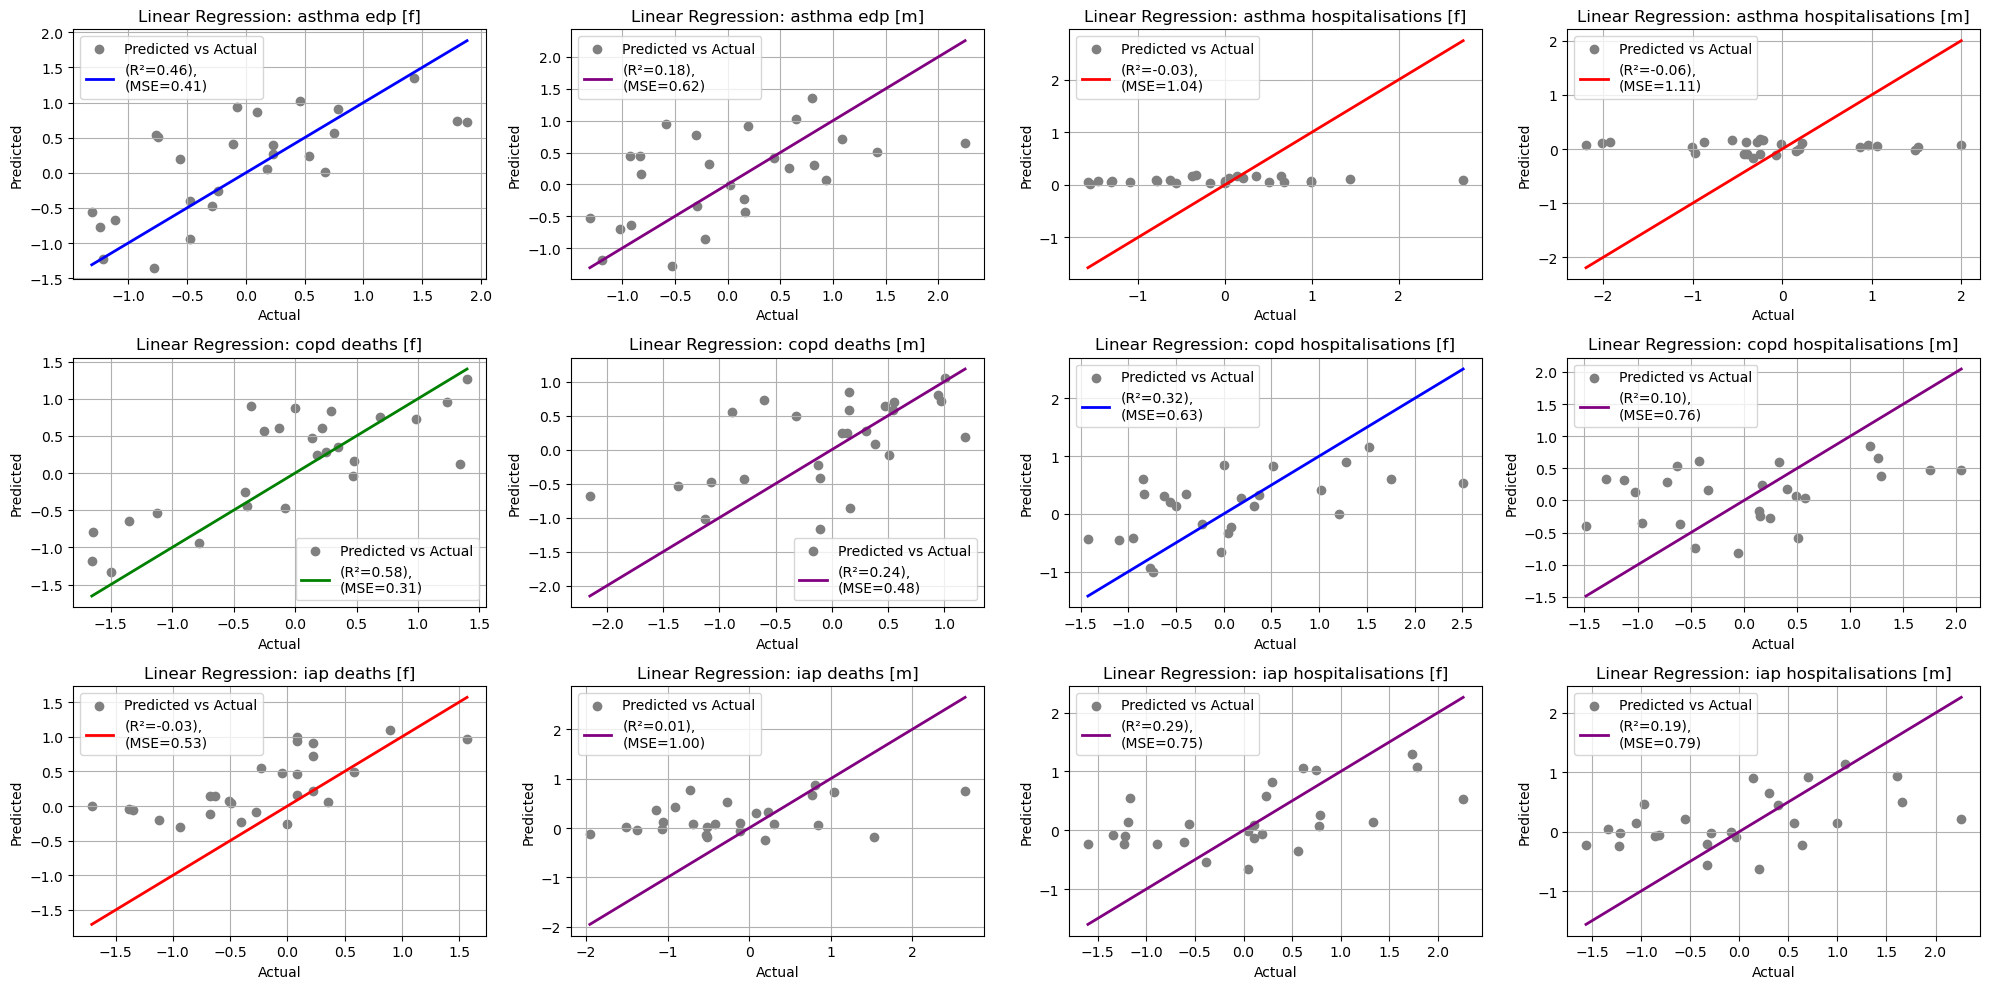

In [117]:
numerical_cols = df_dropped_col_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_col_gender[numerical_cols] = scaler.fit_transform(df_dropped_col_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_col_gender.columns[2:5]
dependent_vars = df_dropped_col_gender.columns[5:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(3, 4, plot_number)
        
    X = df_dropped_col_gender[independent_vars].values
    y = df_dropped_col_gender[i].values

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()


#### Dropped Row Data

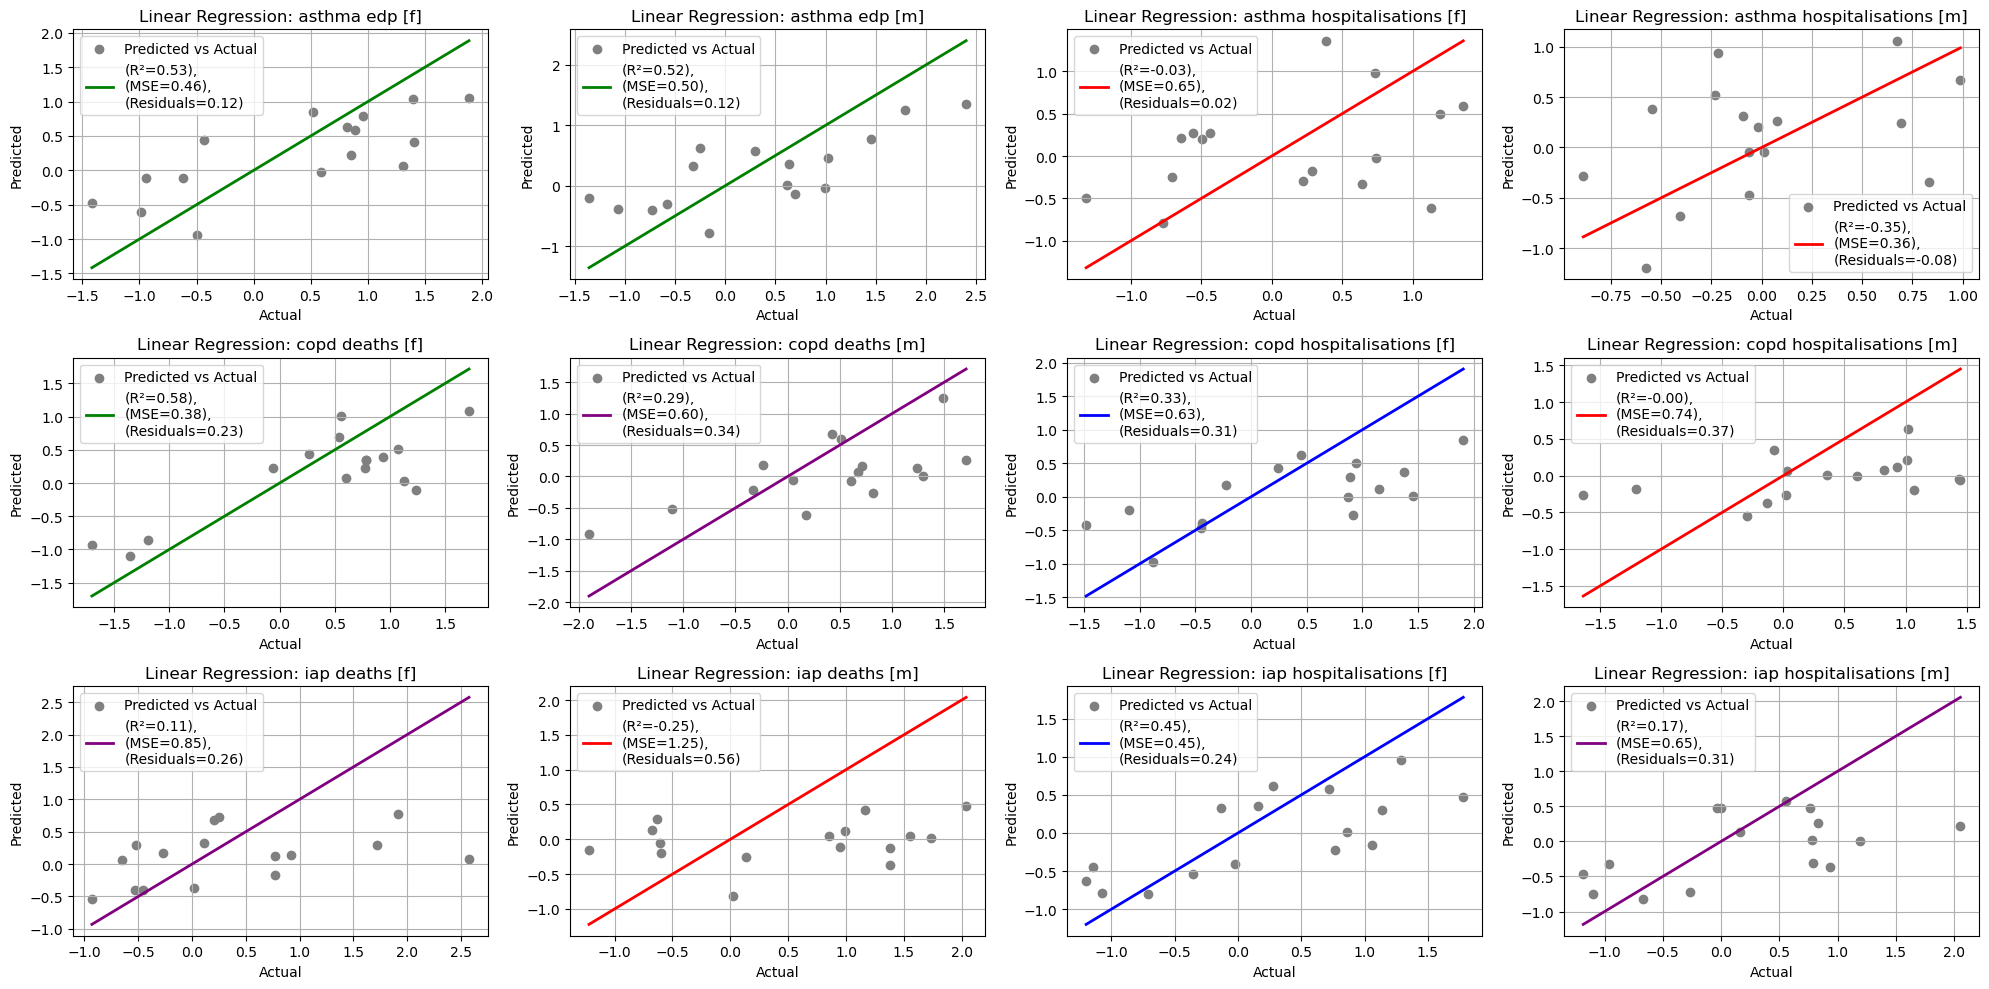

In [118]:
numerical_cols = df_dropped_row_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_row_gender[numerical_cols] = scaler.fit_transform(df_dropped_row_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_row_gender.columns[2:8]
dependent_vars = df_dropped_row_gender.columns[8:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(3, 4, plot_number)
        
    X = df_dropped_row_gender[independent_vars].values
    y = df_dropped_row_gender[i].values
        
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Residuals
    residuals = y_test - y_pred

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f}),\n(Residuals={residuals.mean():.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()

#### All Values Data

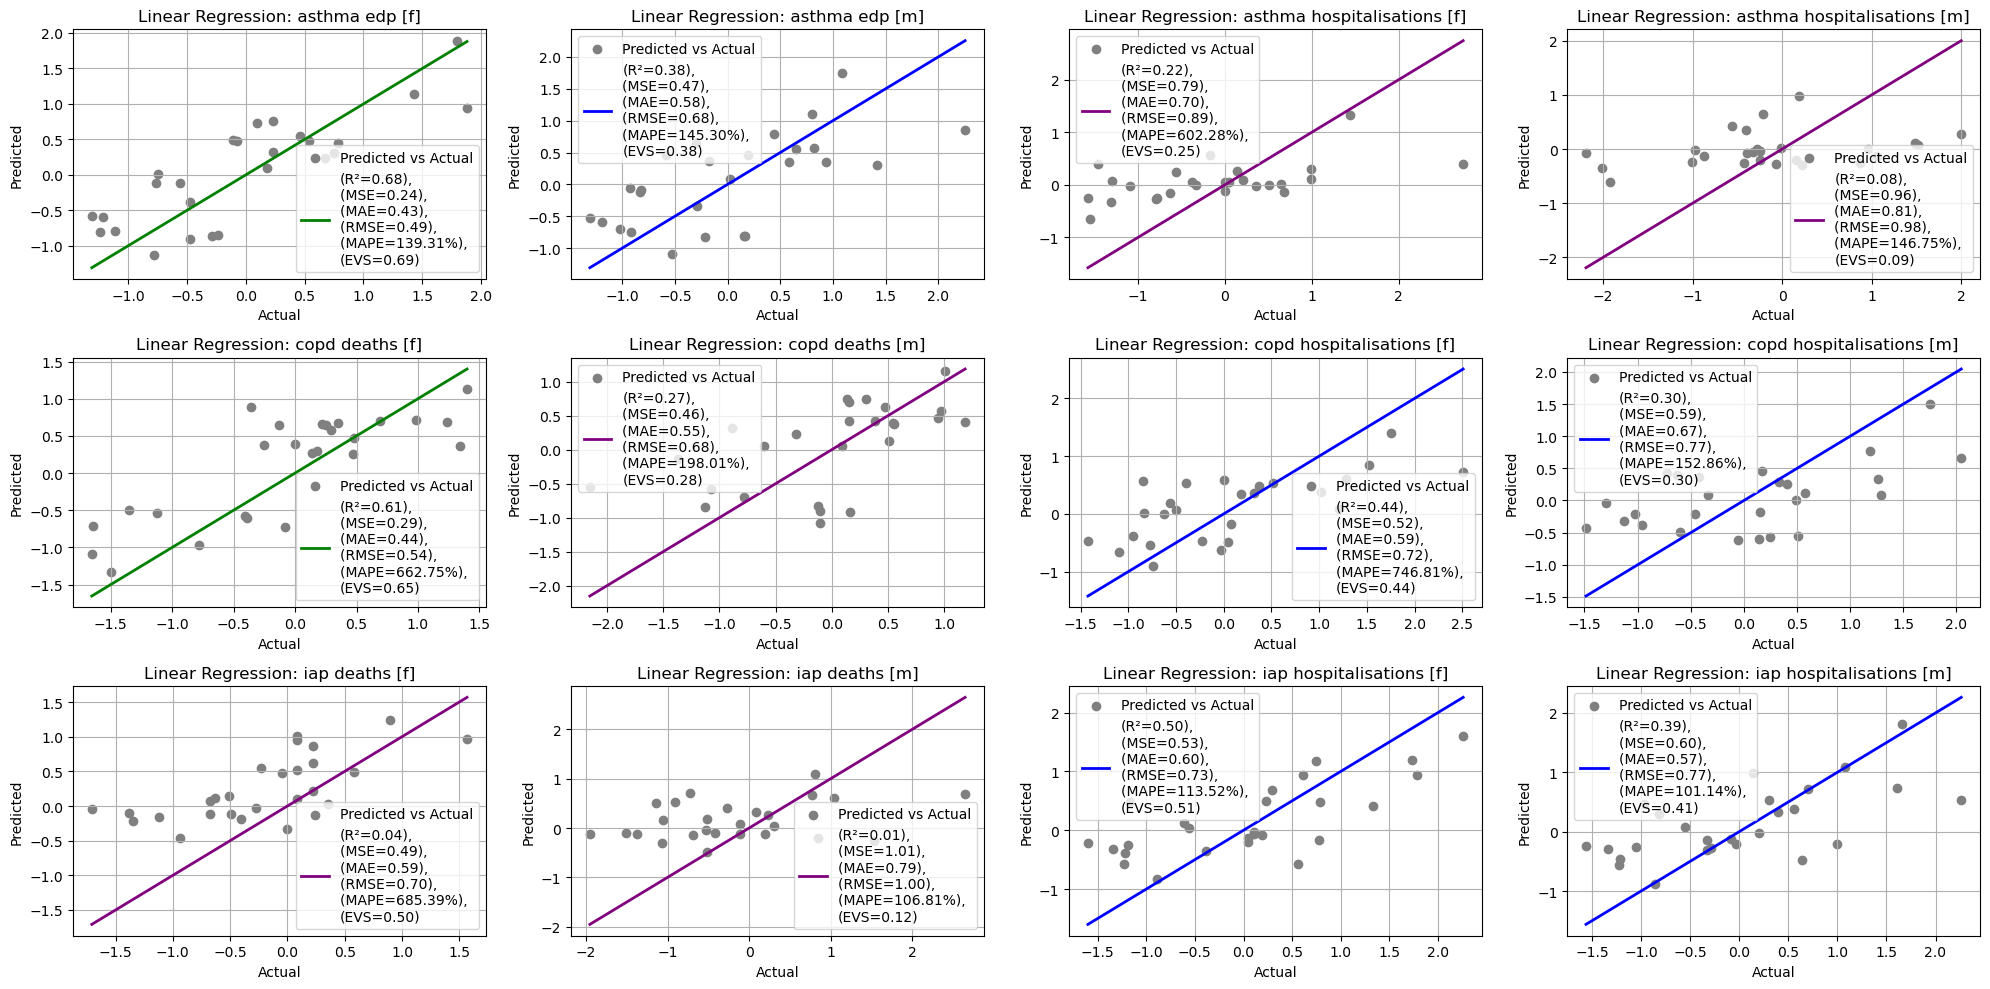

In [119]:
numerical_cols = df_all_data_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_all_data_gender[numerical_cols] = scaler.fit_transform(df_all_data_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_all_data_gender.columns[2:8]
dependent_vars = df_all_data_gender.columns[8:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(3, 4, plot_number)
        
    X = df_all_data_gender[independent_vars].values
    y = df_all_data_gender[i].values
        
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    # Calculate Absolute Percentage Error
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Calculate Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f}), \n(MAE={mae:.2f}), \n(RMSE={rmse:.2f}), \n(MAPE={mape:.2f}%), \n(EVS={evs:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()

### Ungendered Data

#### Dropped Column Data

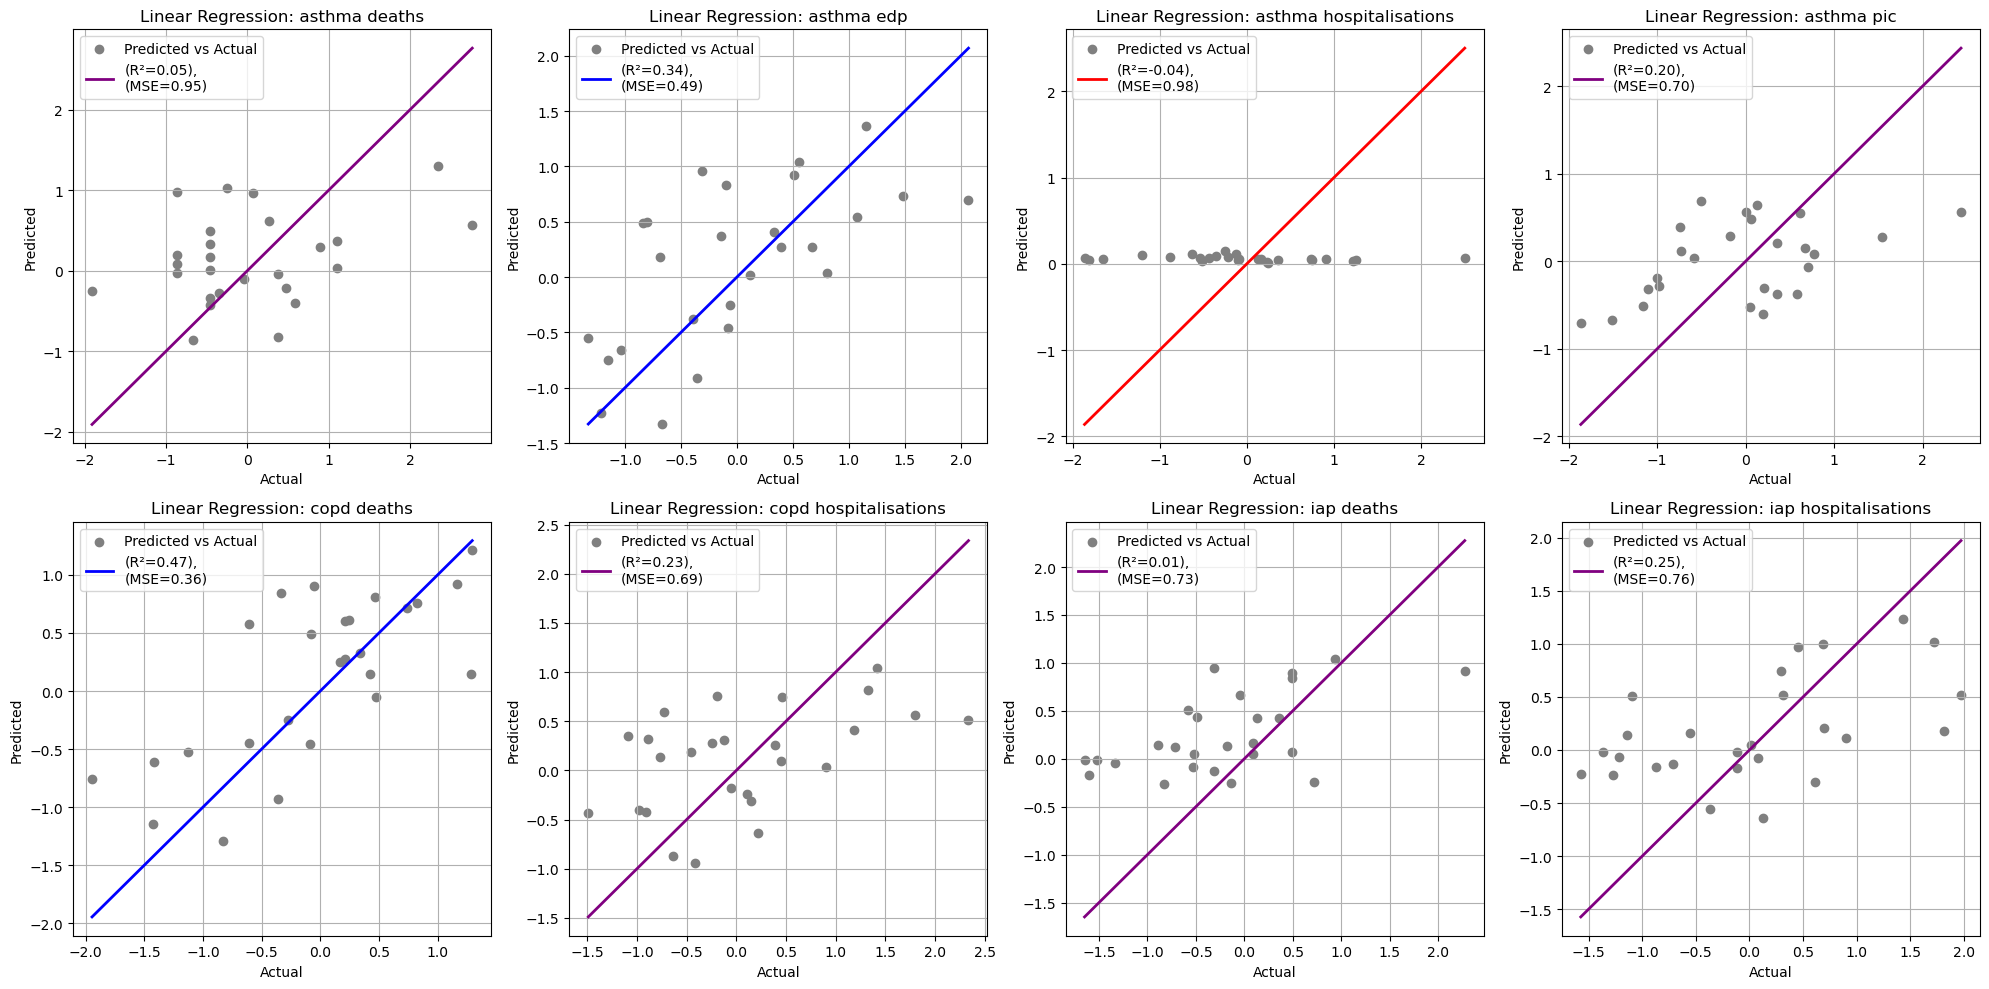

In [120]:
numerical_cols = df_dropped_col_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_col_ungender[numerical_cols] = scaler.fit_transform(df_dropped_col_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_col_ungender.columns[2:5]
dependent_vars = df_dropped_col_ungender.columns[5:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(2, 4, plot_number)
        
    X = df_dropped_col_ungender[independent_vars].values
    y = df_dropped_col_ungender[i].values
        
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()

#### Dropped Row Data

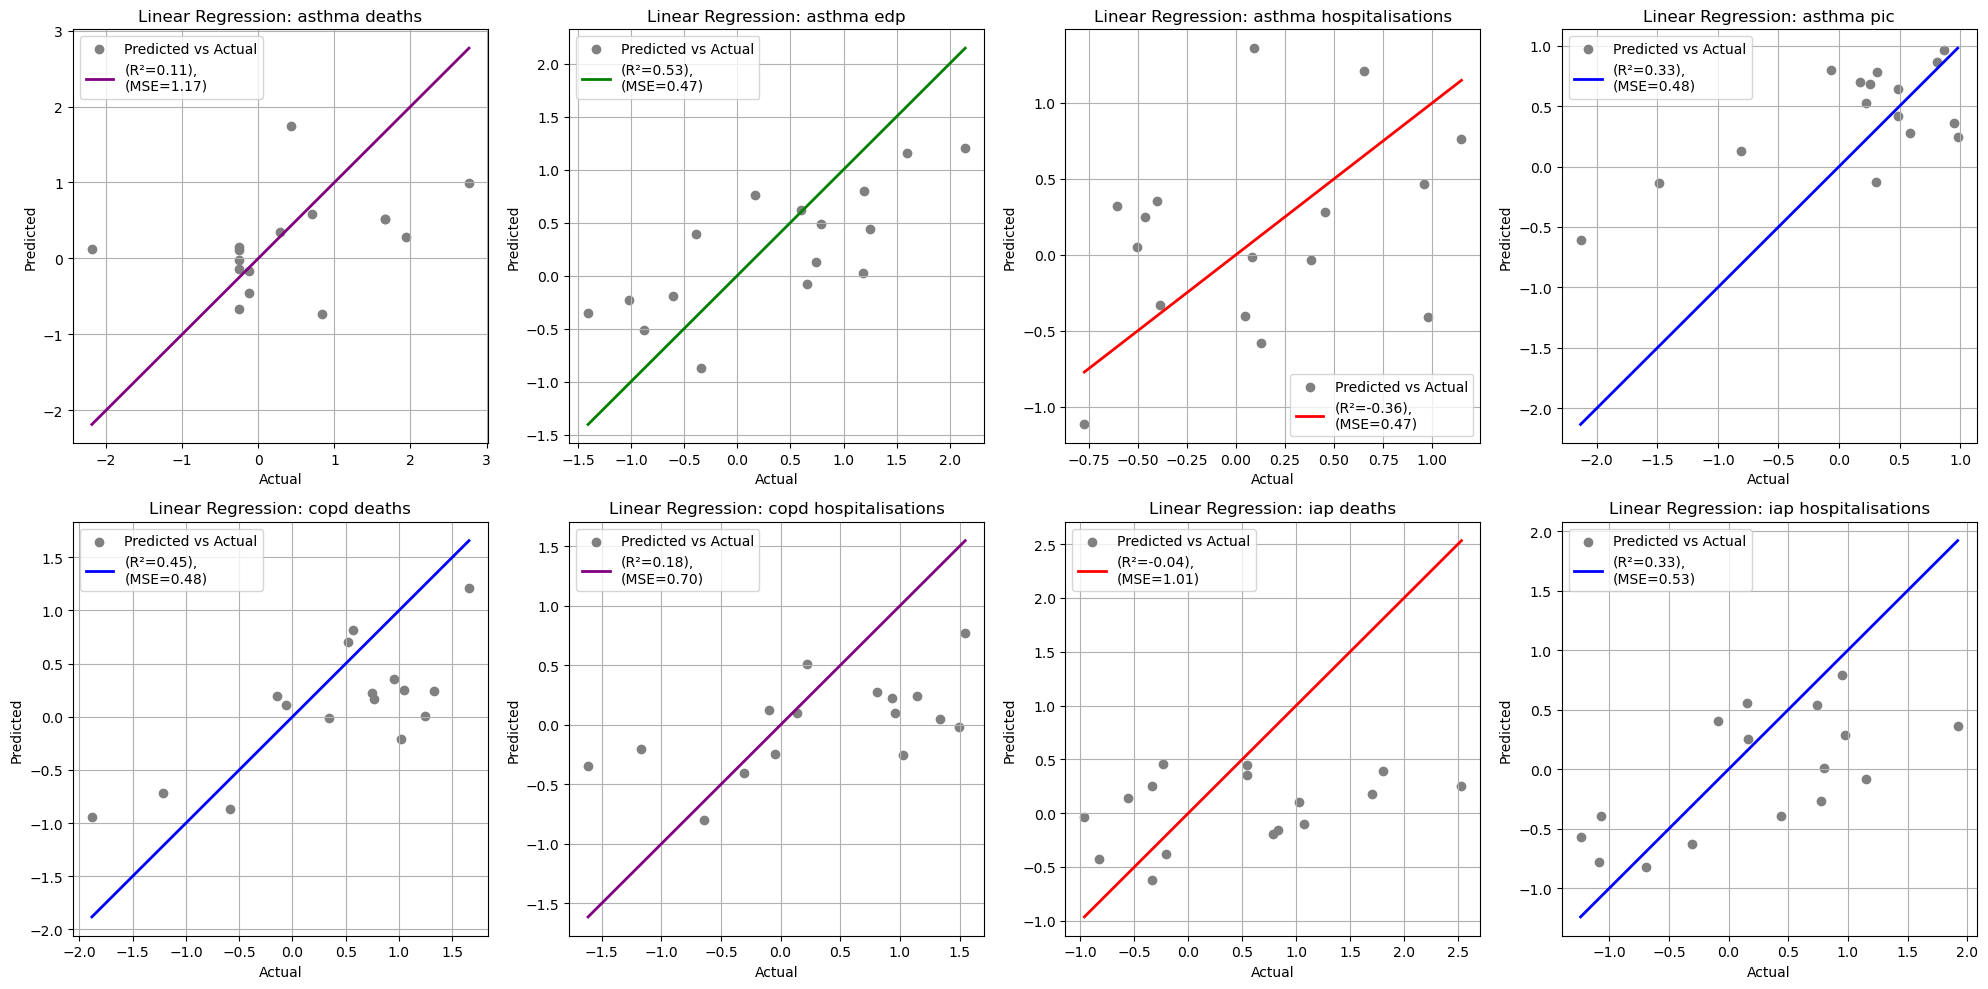

In [121]:
numerical_cols = df_dropped_row_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_row_ungender[numerical_cols] = scaler.fit_transform(df_dropped_row_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_row_ungender.columns[2:8]
dependent_vars = df_dropped_row_ungender.columns[8:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(2, 4, plot_number)
        
    X = df_dropped_row_ungender[independent_vars].values
    y = df_dropped_row_ungender[i].values
        
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()

#### All Values Data

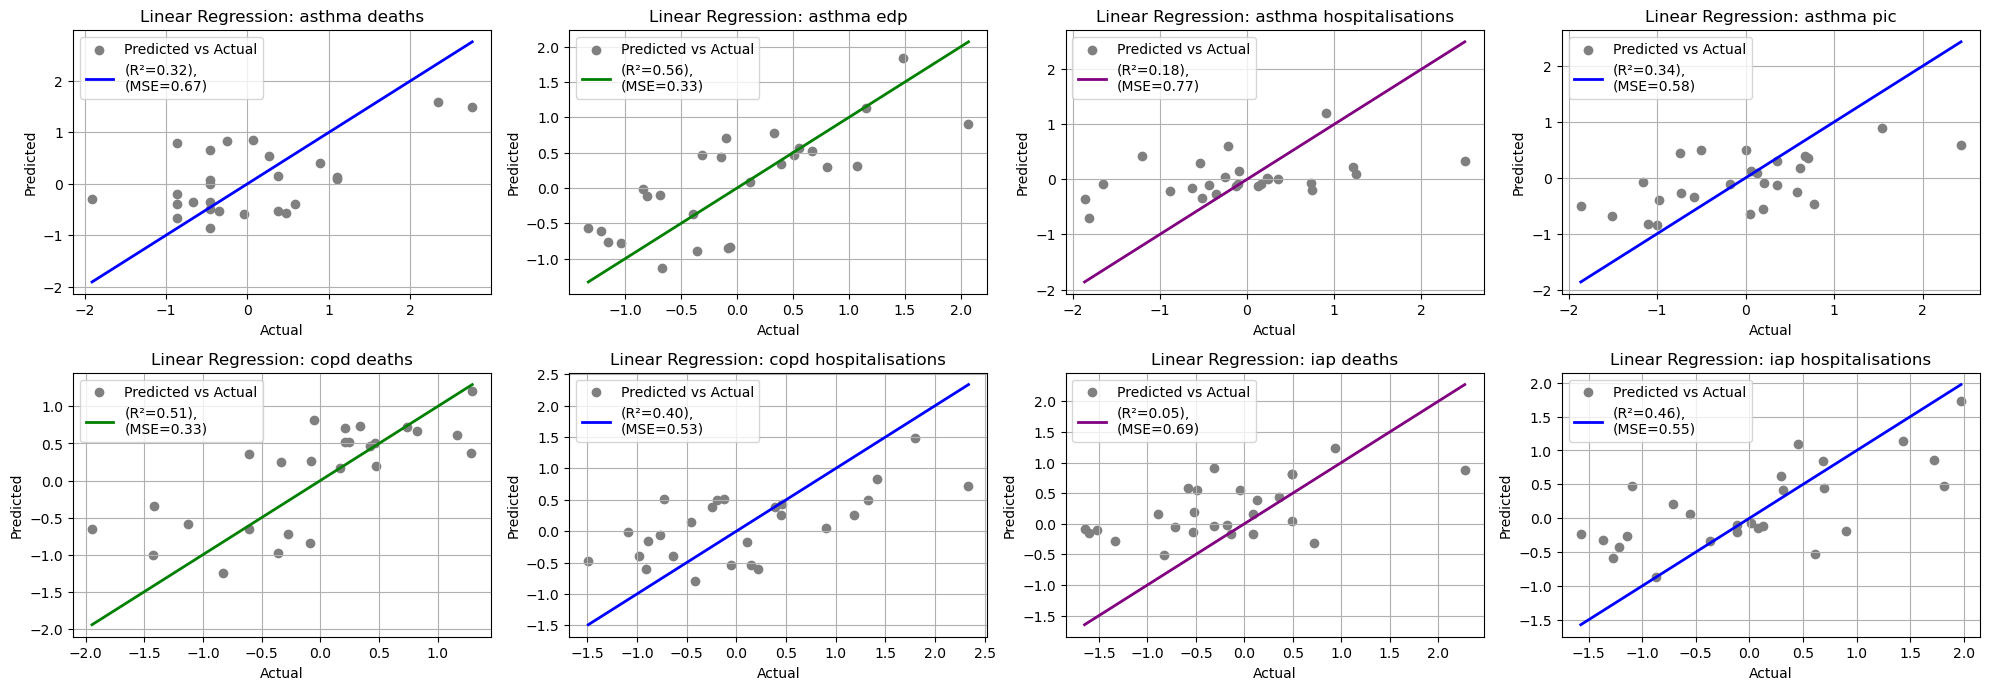

In [122]:
numerical_cols = df_all_data_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_all_data_ungender[numerical_cols] = scaler.fit_transform(df_all_data_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_all_data_ungender.columns[2:8]
dependent_vars = df_all_data_ungender.columns[8:]

plot_number = 1

plt.figure(figsize=(20, 10))

for i in dependent_vars:
    plt.subplot(3, 4, plot_number)
        
    X = df_all_data_ungender[independent_vars].values
    y = df_all_data_ungender[i].values
        
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {i}')
    plt.legend()
    plt.grid(True)
        
    plot_number += 1

plt.tight_layout()
plt.show()

## Single Independent Variable vs Dependent Variable

### Gendered Data

#### Dropped Column Data

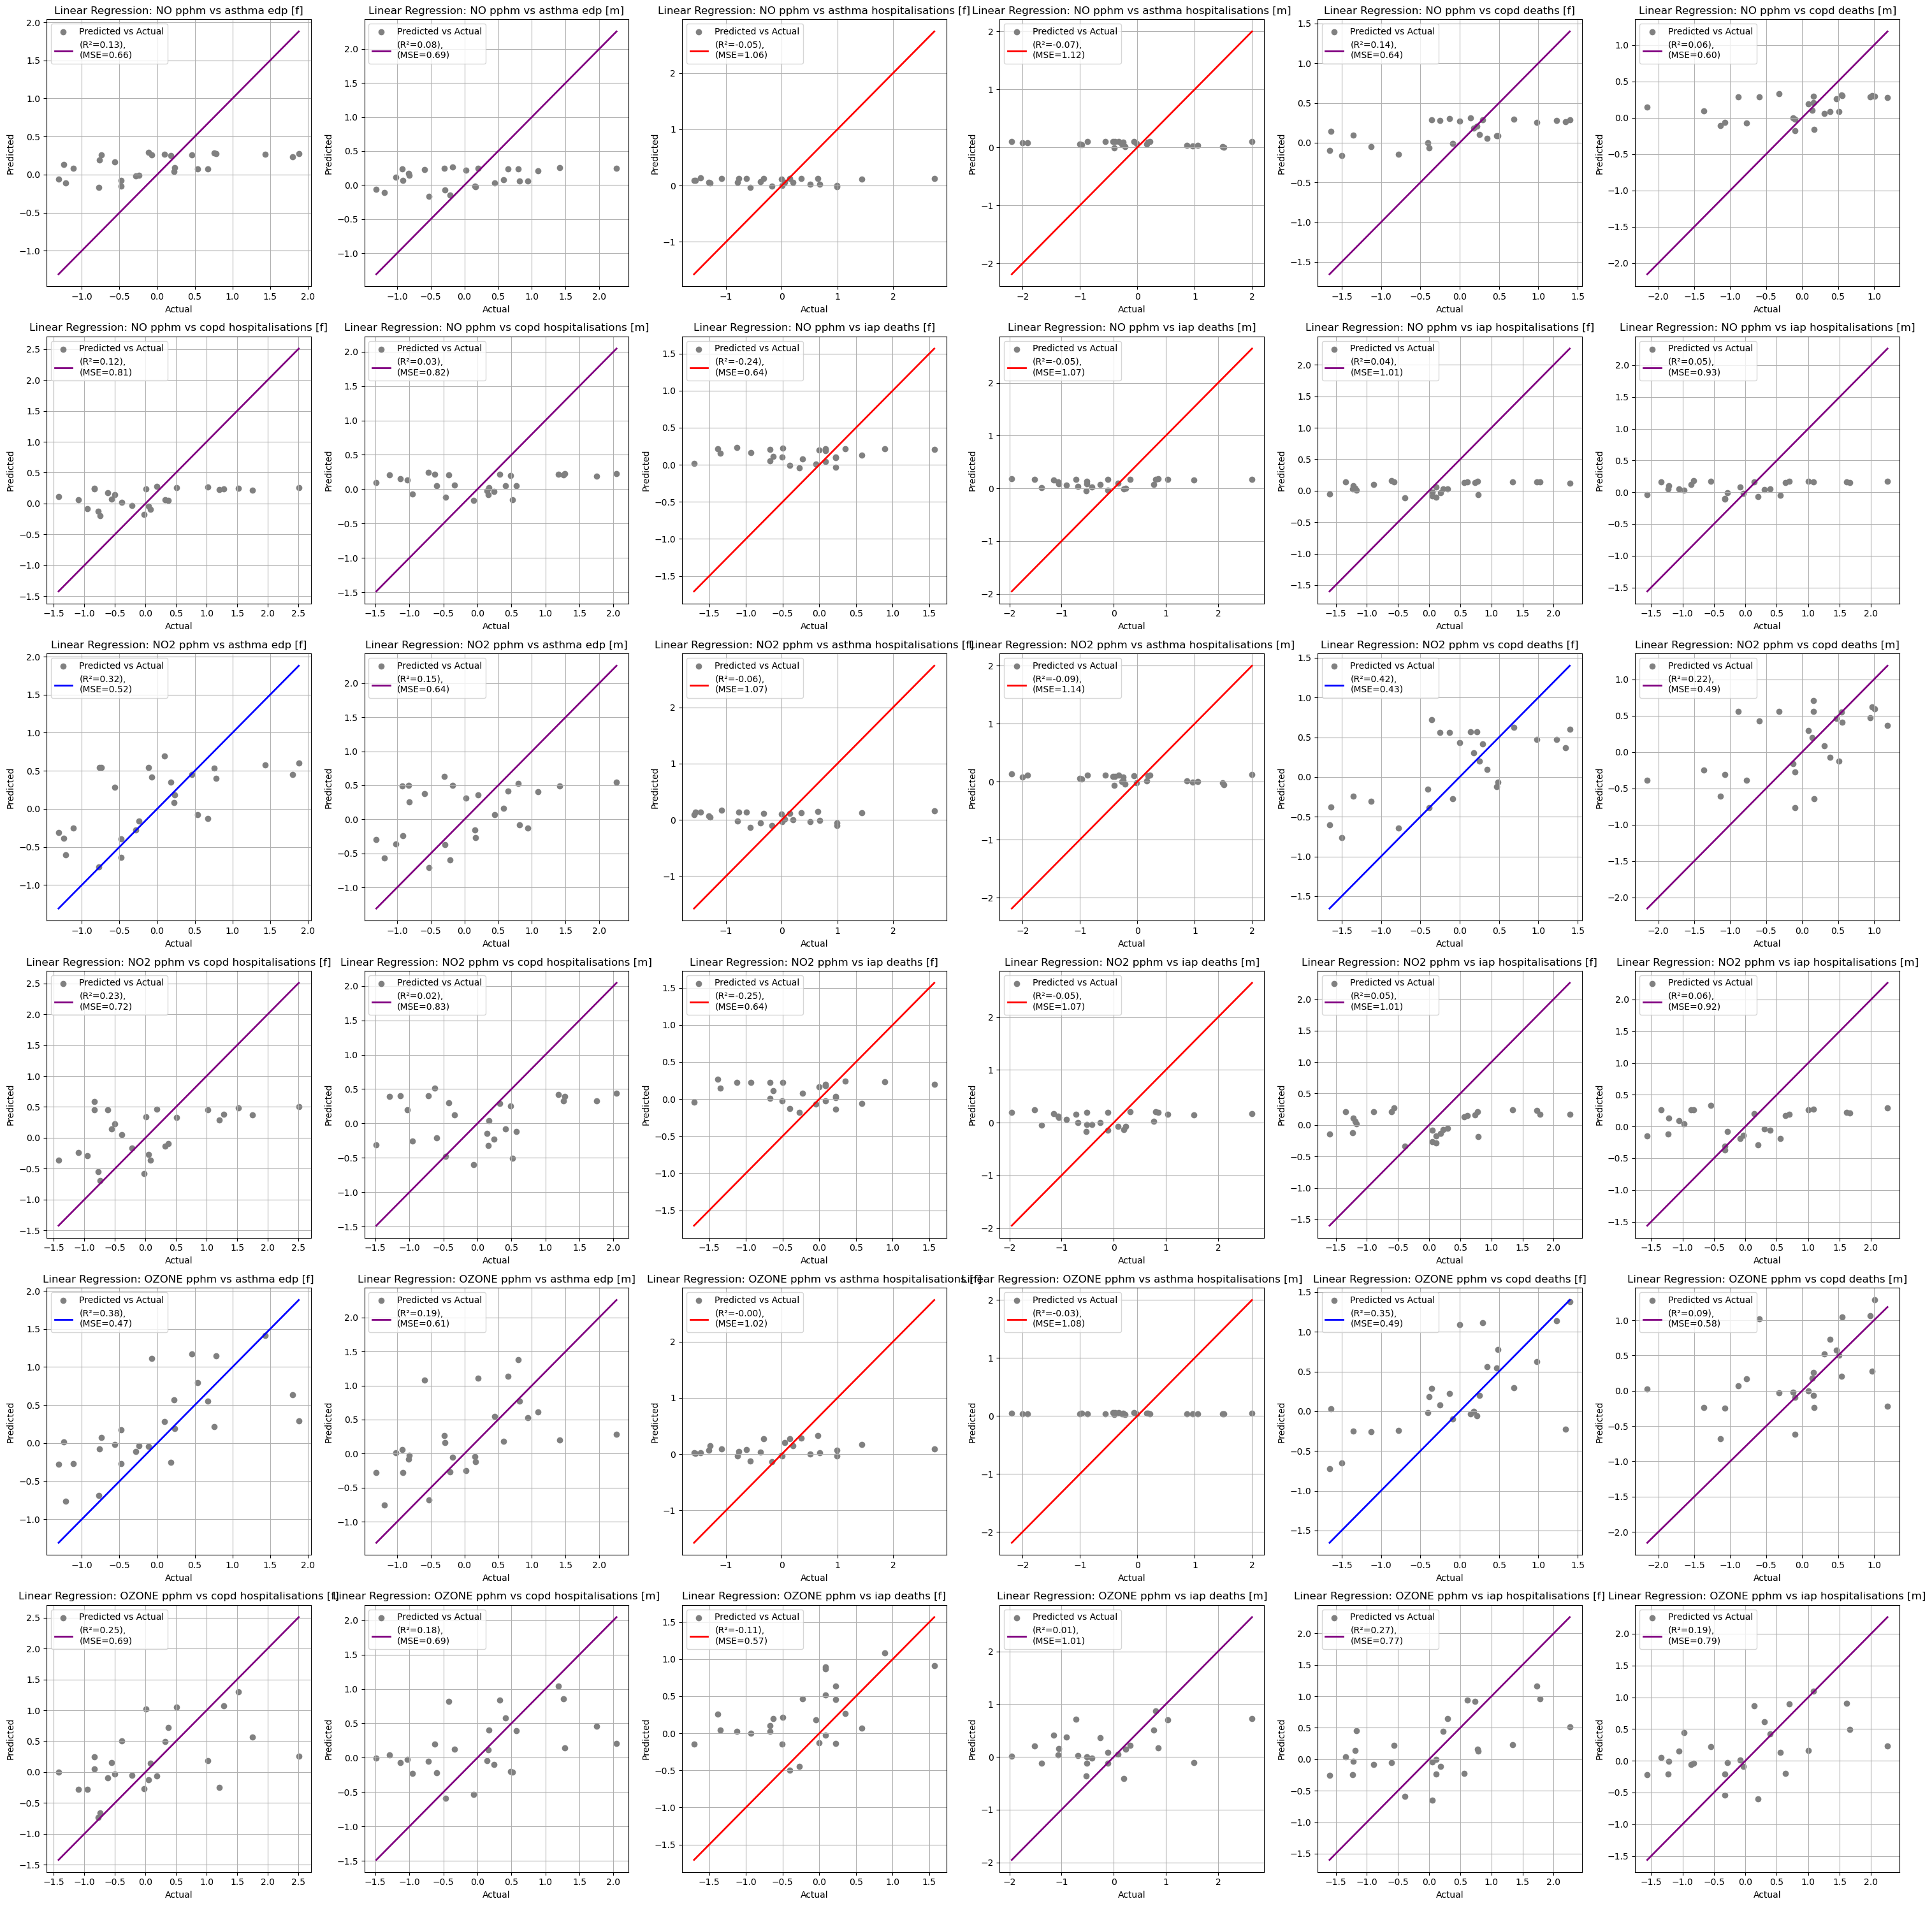

In [123]:
numerical_cols = df_dropped_col_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_col_gender[numerical_cols] = scaler.fit_transform(df_dropped_col_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_col_gender.columns[2:5]
dependent_vars = df_dropped_col_gender.columns[5:]

plt.figure(figsize=(30, 30))

plot_number = 1

for x_var in independent_vars:
  for y_var in dependent_vars:
    plt.subplot(6, 6, plot_number)
    
    X = df_dropped_col_gender[[x_var]].values
    y = df_dropped_col_gender[y_var].values
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
      line_color = 'red'
    elif 0 < r2 <= 0.3:
      line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
      line_color = 'blue'
    else:
      line_color = 'green'
    
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {x_var} vs {y_var}')
    plt.legend()
    plt.grid(True)
    
    plot_number += 1

plt.tight_layout()
plt.show()

#### Dropped Row Data

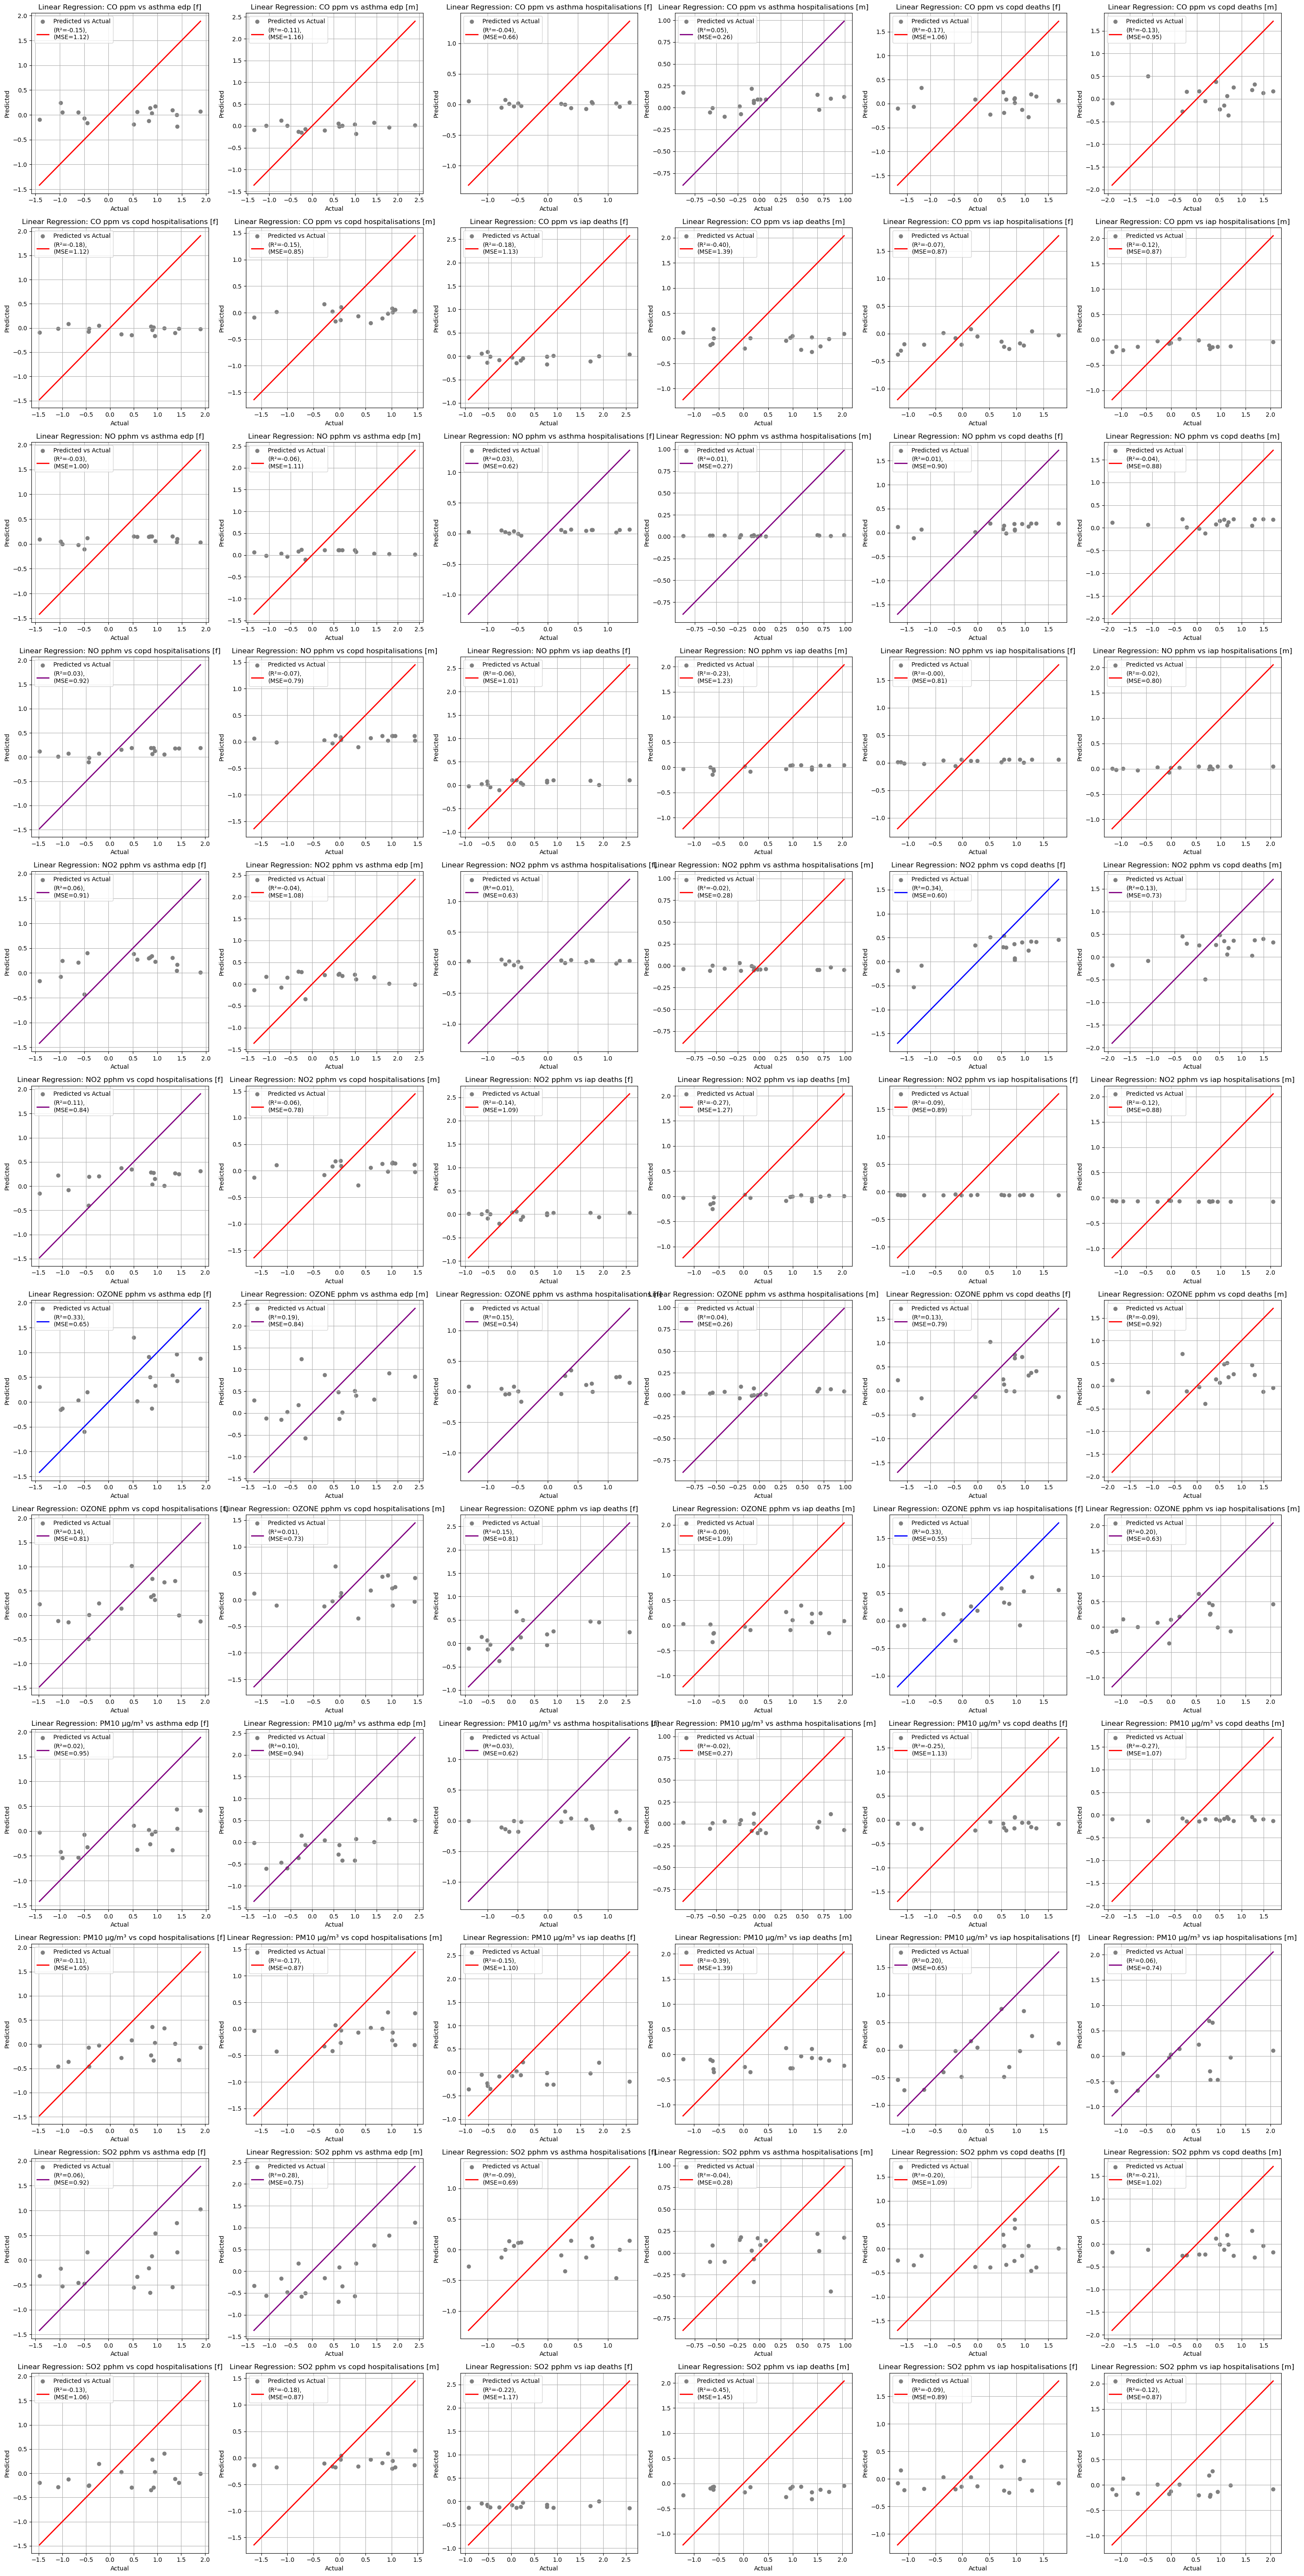

In [124]:
numerical_cols = df_dropped_row_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_row_gender[numerical_cols] = scaler.fit_transform(df_dropped_row_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_row_gender.columns[2:8]
dependent_vars = df_dropped_row_gender.columns[8:]

plt.figure(figsize=(30, 60))

plot_number = 1

for x_var in independent_vars:
  for y_var in dependent_vars:
    plt.subplot(12, 6, plot_number)
    
    X = df_dropped_row_gender[[x_var]].values
    y = df_dropped_row_gender[y_var].values
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
      line_color = 'red'
    elif 0 < r2 <= 0.3:
      line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
      line_color = 'blue'
    else:
      line_color = 'green'
    
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression: {x_var} vs {y_var}')
    plt.legend()
    plt.grid(True)
    
    plot_number += 1

plt.tight_layout()
plt.show()

#### All Values Data

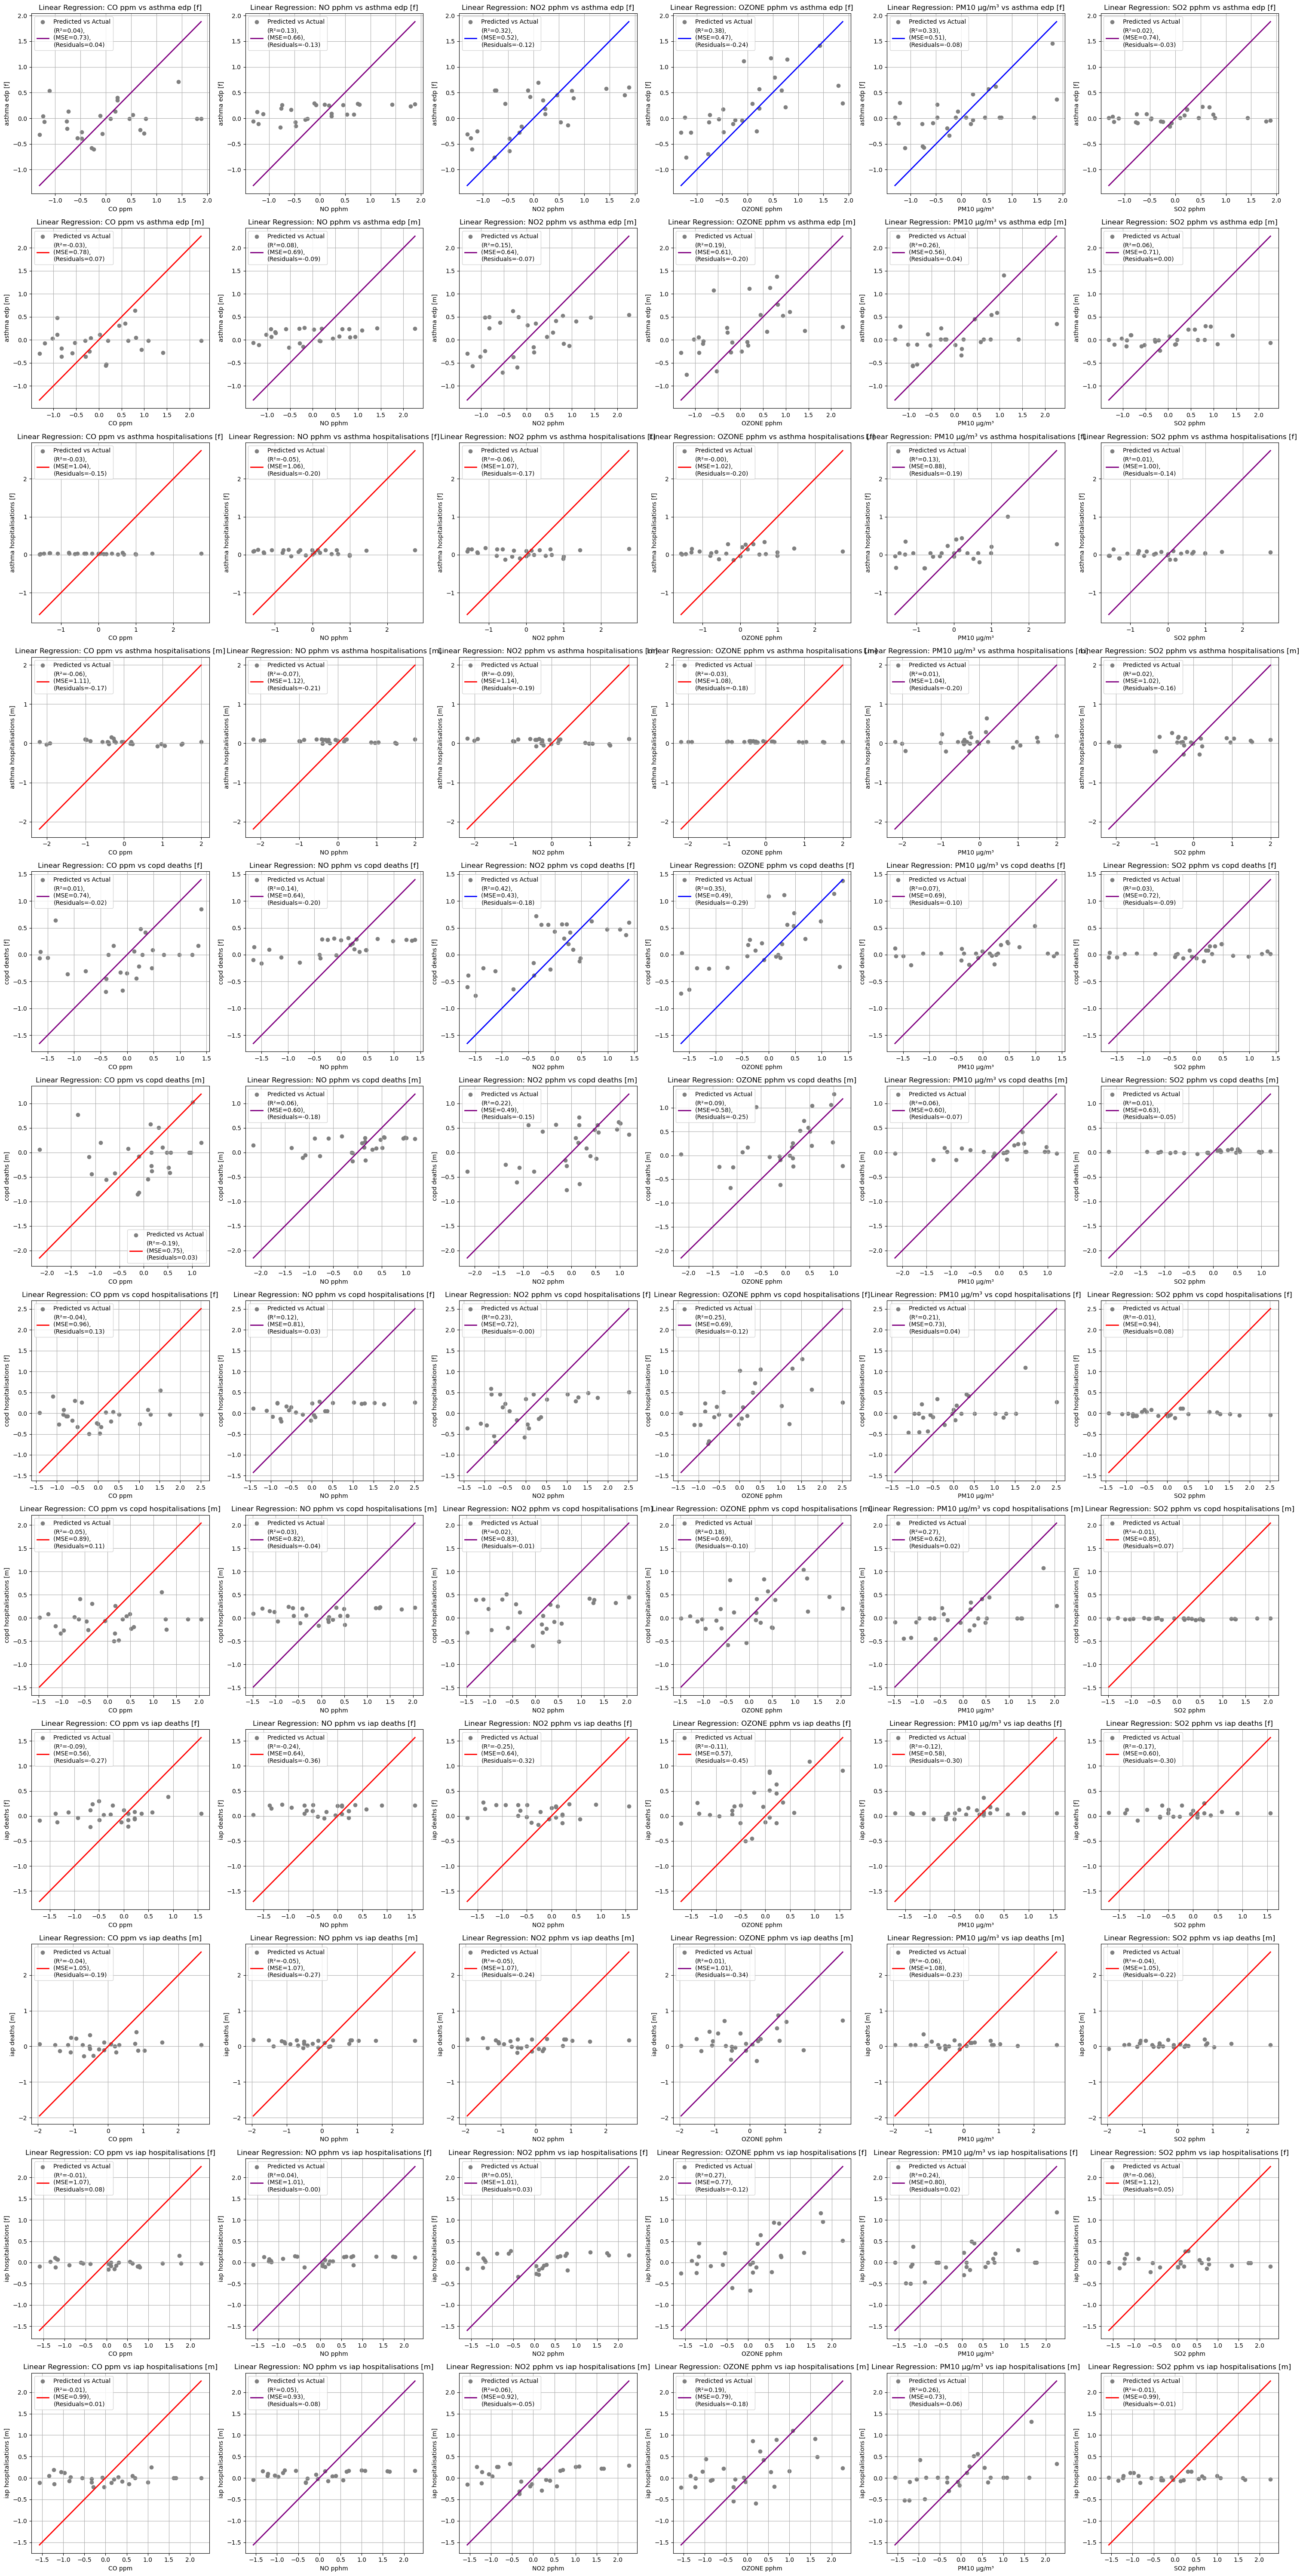

In [125]:
numerical_cols = df_all_data_gender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_all_data_gender[numerical_cols] = scaler.fit_transform(df_all_data_gender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_all_data_gender.columns[2:8]
dependent_vars = df_all_data_gender.columns[8:]

plot_number = 1

plt.figure(figsize=(30, 60))

for y_var in dependent_vars:
    for x_var in independent_vars:
        plt.subplot(12, 6, plot_number)
        
        X = df_all_data_gender[[x_var]].values
        y = df_all_data_gender[y_var].values
        
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate Residuals
        residuals = y_test - y_pred

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        # Determine the color of the best fit line based on R² score
        if r2 <= 0:
            line_color = 'red'
        elif 0 < r2 <= 0.3:
            line_color = 'purple'
        elif 0.3 < r2 <= 0.5:
            line_color = 'blue'
        else:
            line_color = 'green'
        
        plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f}), \n(Residuals={residuals.mean():.2f})')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(f'Linear Regression: {x_var} vs {y_var}')
        plt.legend()
        plt.grid(True)
        
        plot_number += 1

plt.tight_layout()
plt.show()

### Ungendered Data

#### Dropped Column Data

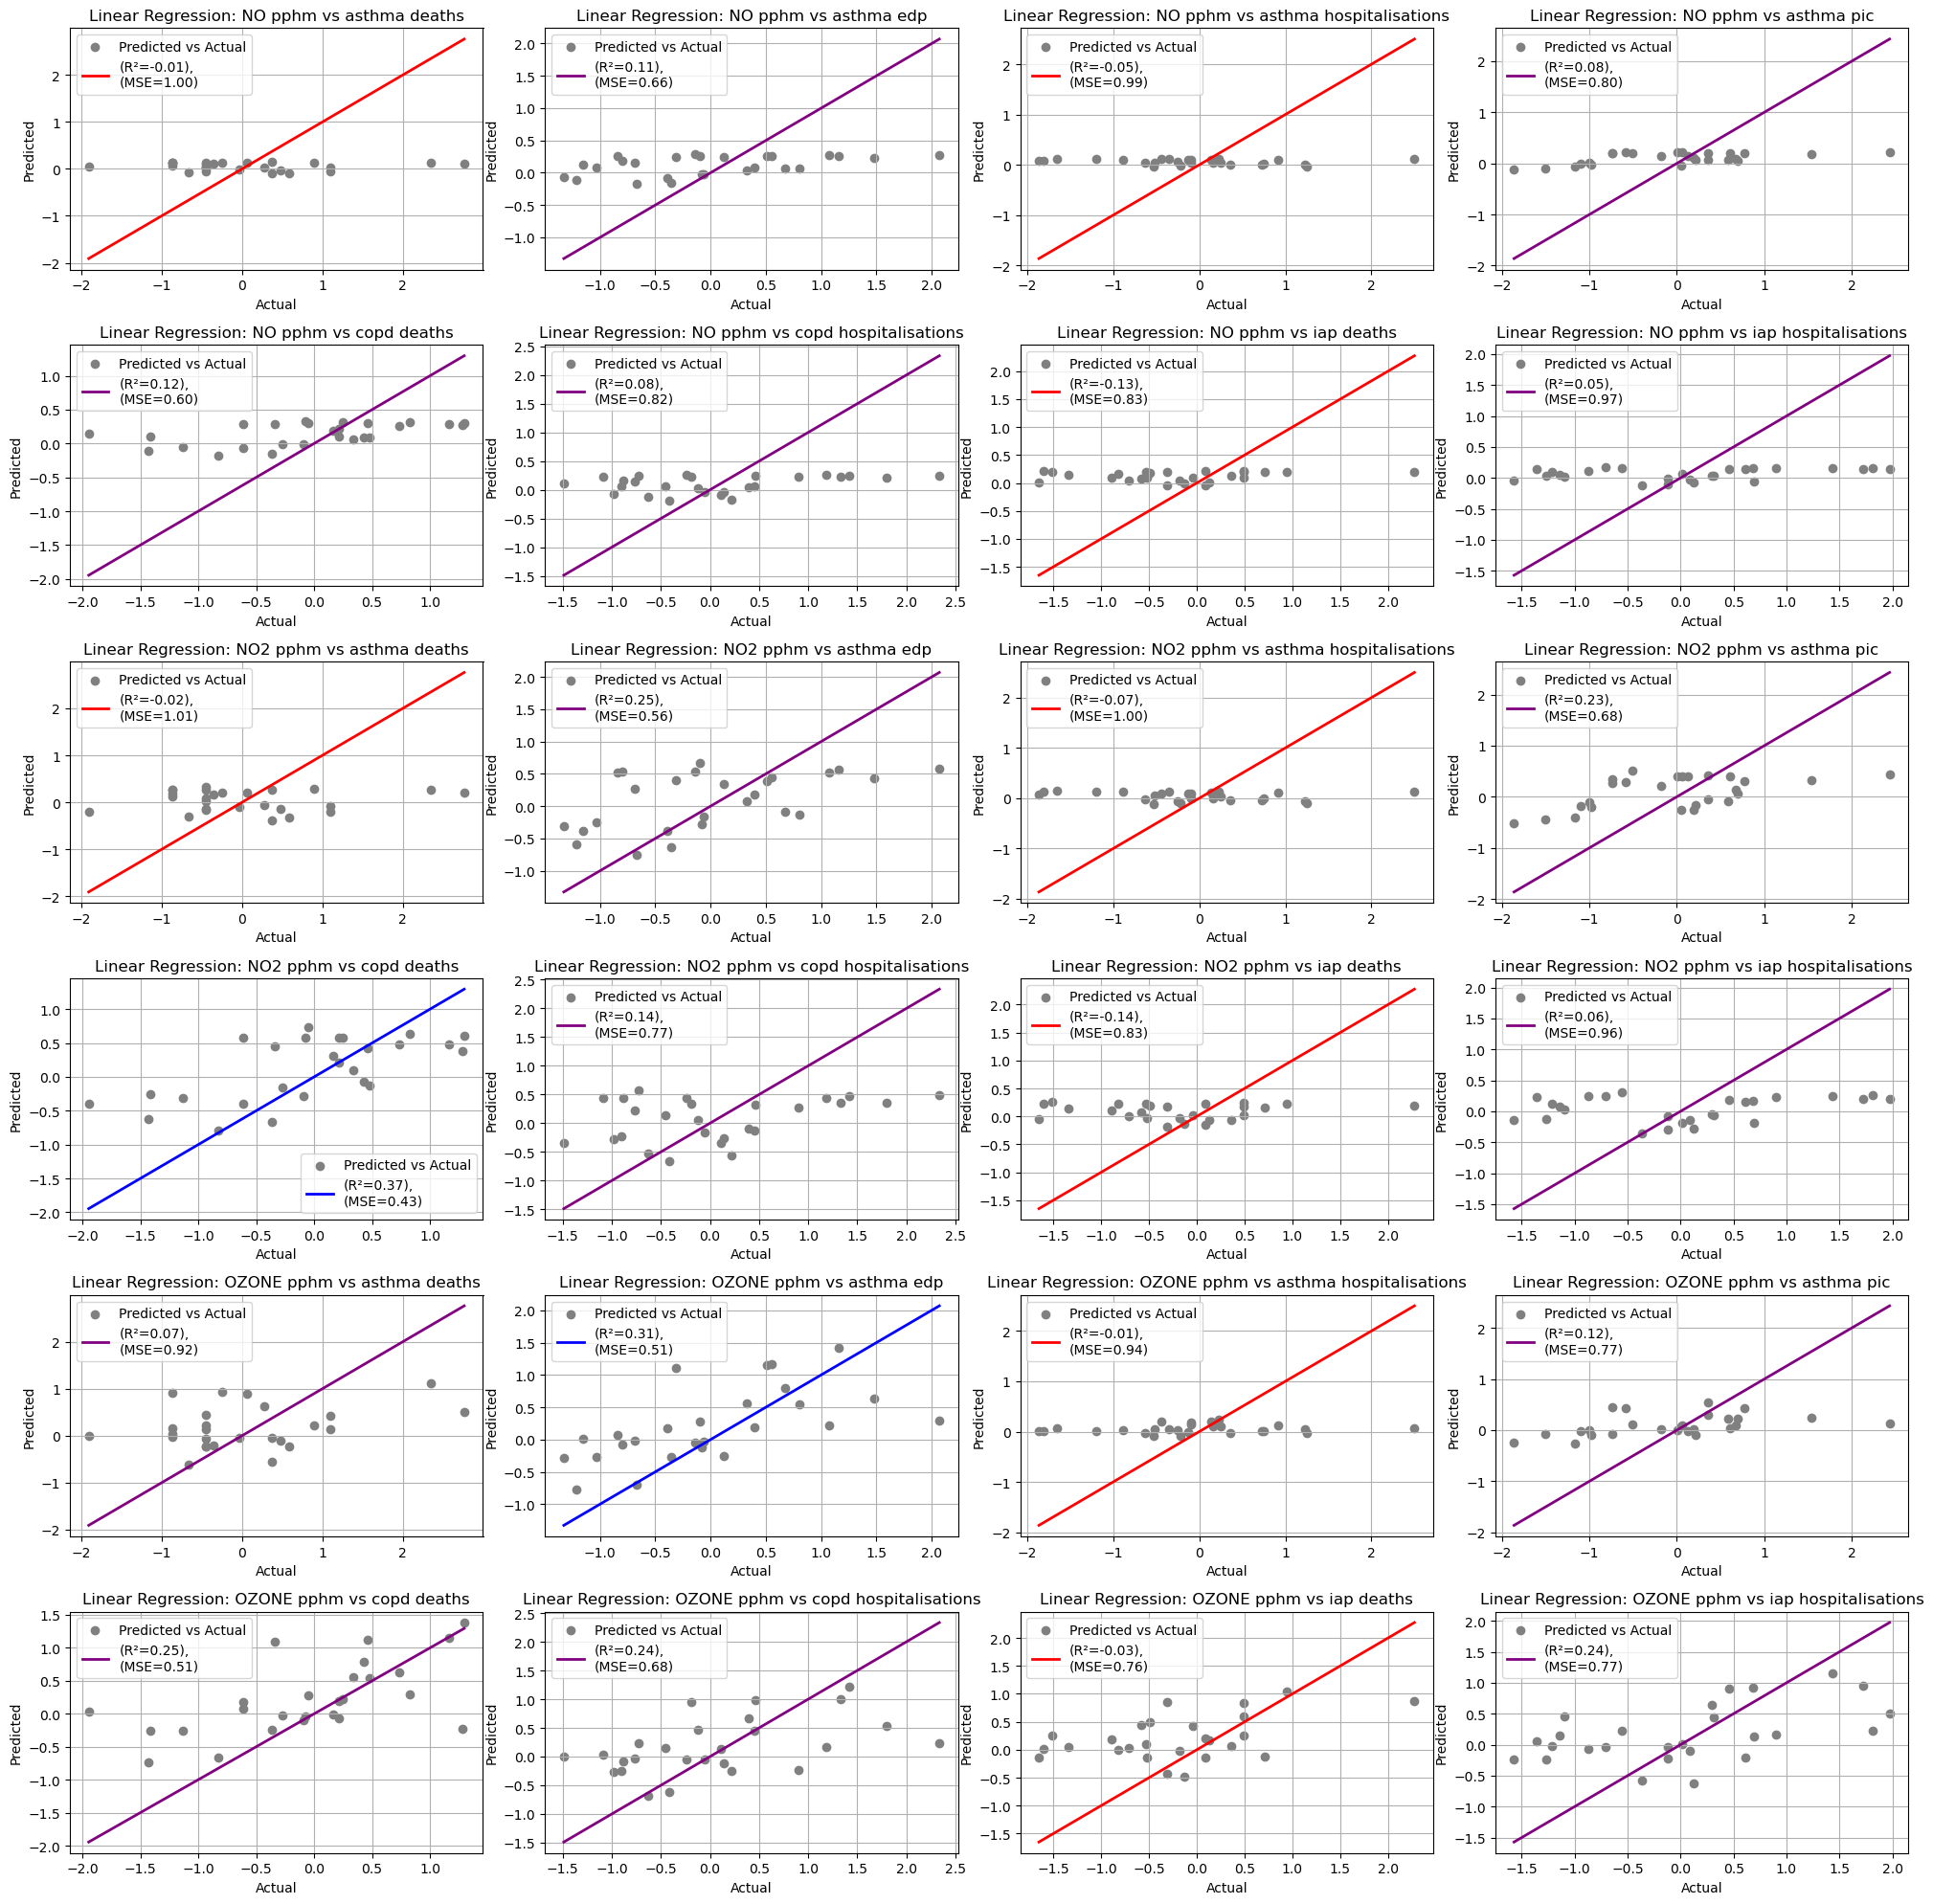

In [126]:
numerical_cols = df_dropped_col_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_col_ungender[numerical_cols] = scaler.fit_transform(df_dropped_col_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_col_ungender.columns[2:5]
dependent_vars = df_dropped_col_ungender.columns[5:]

plt.figure(figsize=(20, 20))

plot_number = 1

for x_var in independent_vars:
    for y_var in dependent_vars:
        plt.subplot(6, 4, plot_number)
        
        X = df_dropped_col_ungender[[x_var]].values
        y = df_dropped_col_ungender[y_var].values
        
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        # Determine the color of the best fit line based on R² score
        if r2 <= 0:
            line_color = 'red'
        elif 0 < r2 <= 0.3:
            line_color = 'purple'
        elif 0.3 < r2 <= 0.5:
            line_color = 'blue'
        else:
            line_color = 'green'
        
        plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Linear Regression: {x_var} vs {y_var}')
        plt.legend()
        plt.grid(True)
        
        plot_number += 1

plt.tight_layout()
plt.show()

#### Dropped Row Data

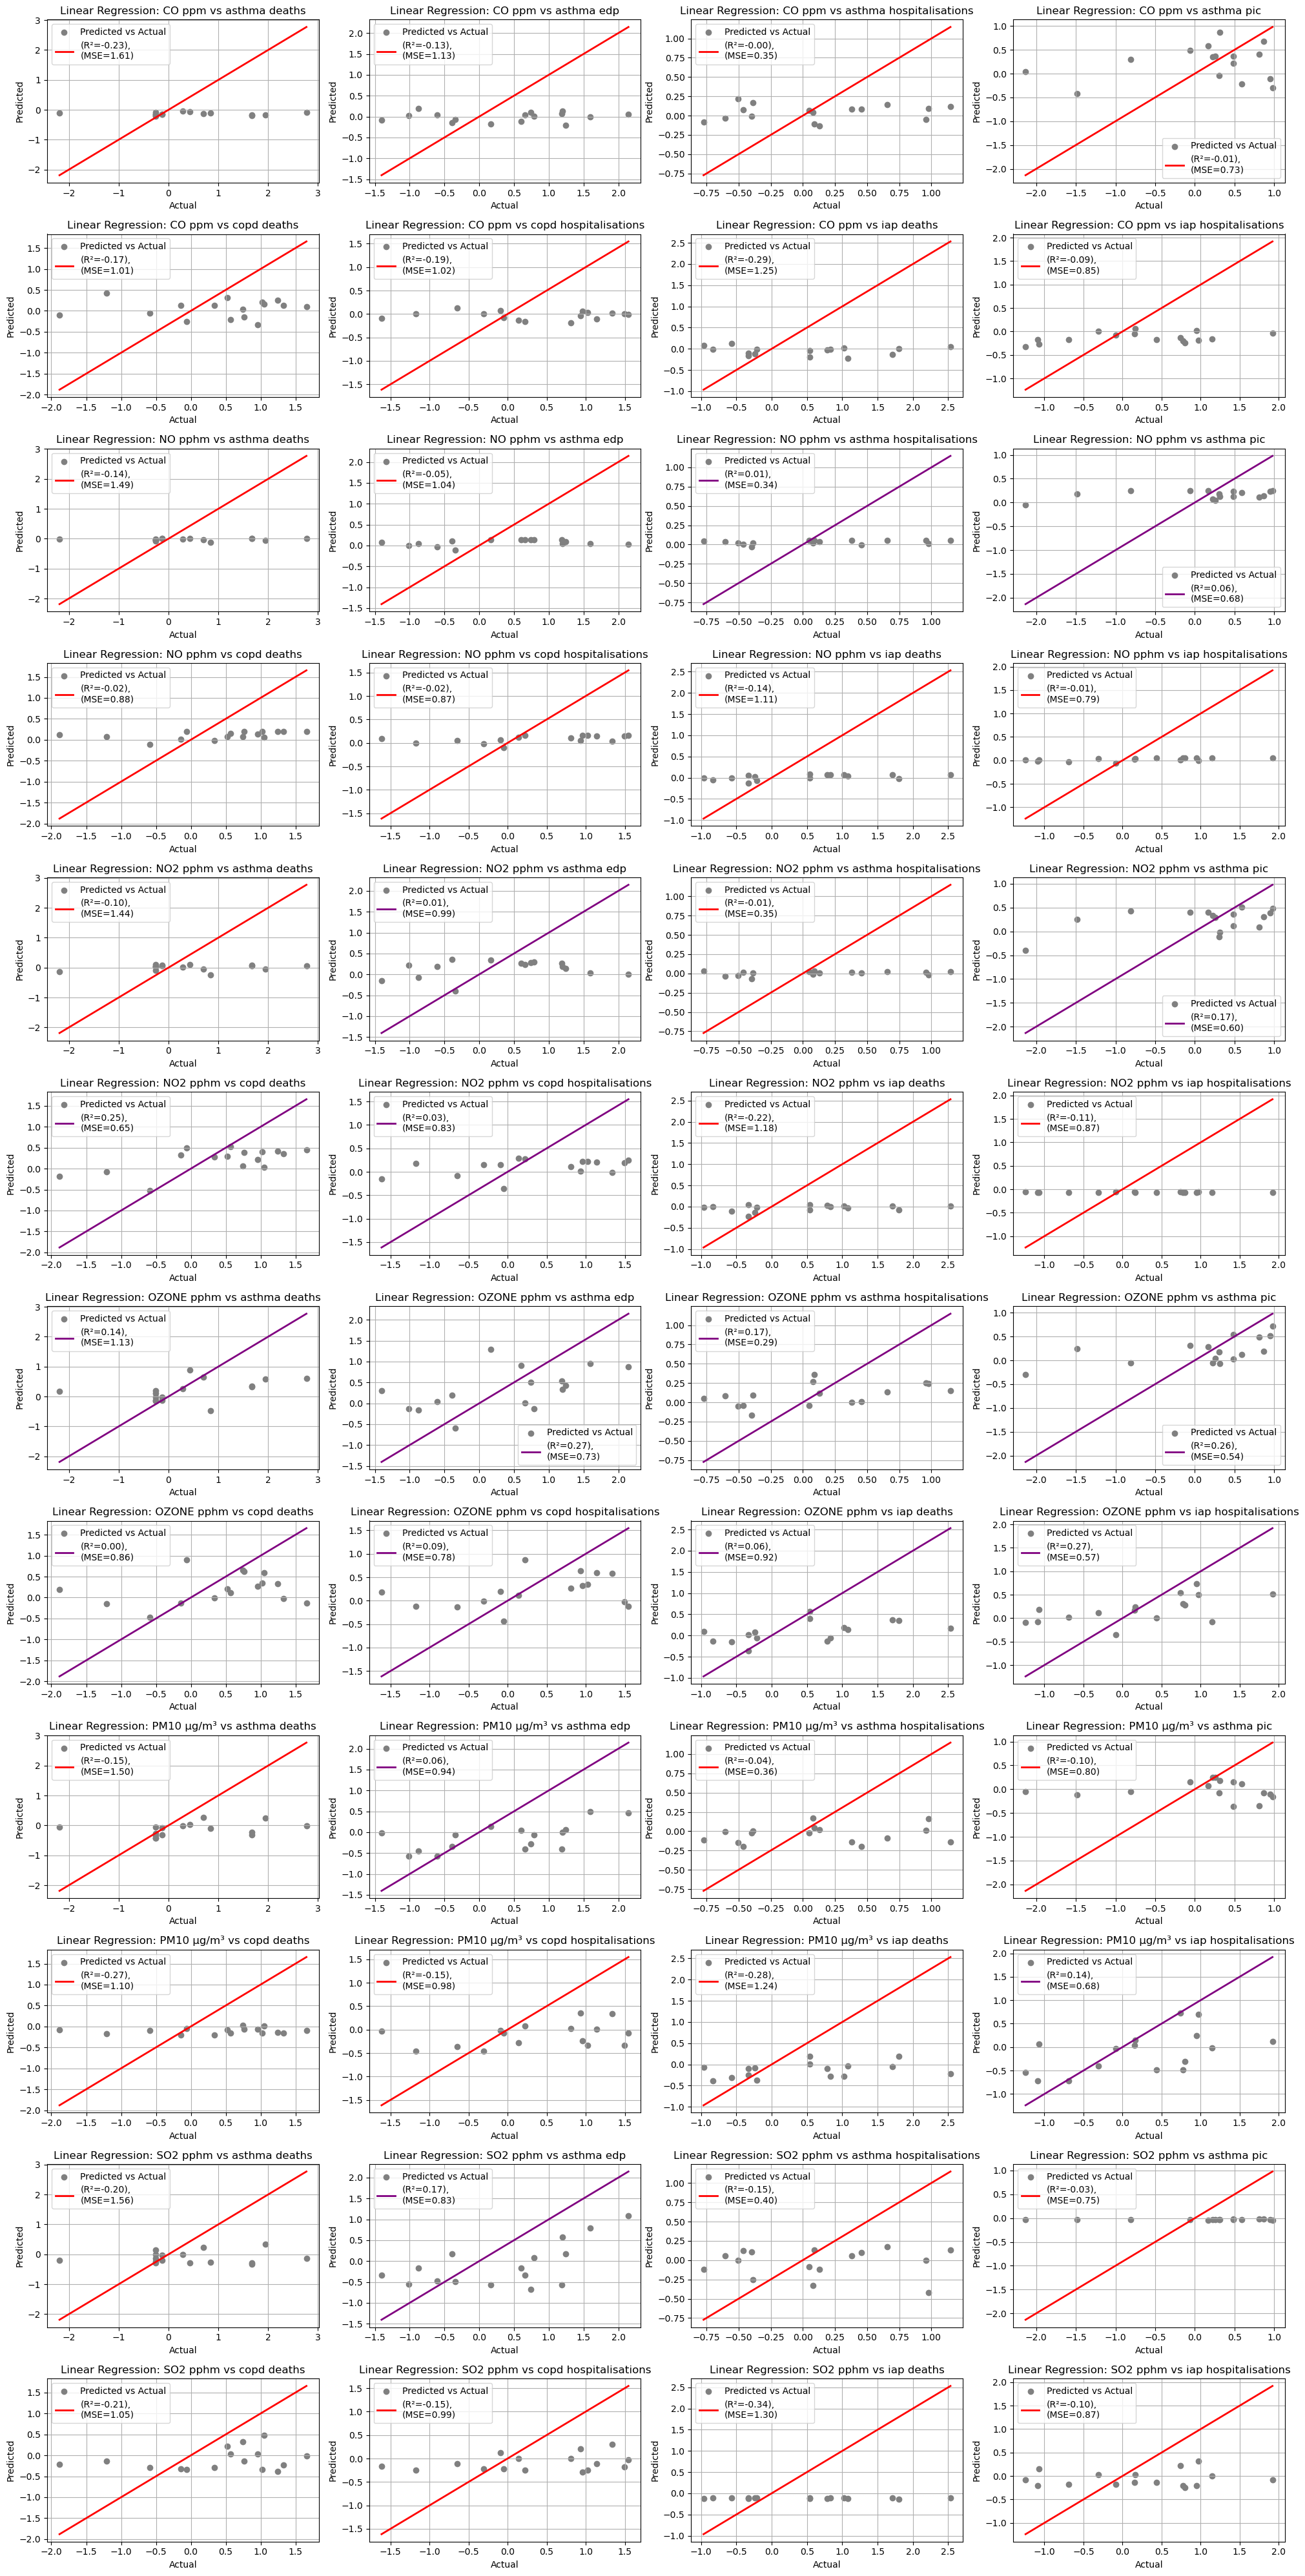

In [127]:
numerical_cols = df_dropped_row_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_dropped_row_ungender[numerical_cols] = scaler.fit_transform(df_dropped_row_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_dropped_row_ungender.columns[2:8]
dependent_vars = df_dropped_row_ungender.columns[8:]

plt.figure(figsize=(20, 40))

plot_number = 1

for x_var in independent_vars:
    for y_var in dependent_vars:
        plt.subplot(12, 4, plot_number)
        
        X = df_dropped_row_ungender[[x_var]].values
        y = df_dropped_row_ungender[y_var].values
        
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)

        # Determine the color of the best fit line based on R² score
        if r2 <= 0:
            line_color = 'red'
        elif 0 < r2 <= 0.3:
            line_color = 'purple'
        elif 0.3 < r2 <= 0.5:
            line_color = 'blue'
        else:
            line_color = 'green'
        
        plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Linear Regression: {x_var} vs {y_var}')
        plt.legend()
        plt.grid(True)
        
        plot_number += 1

plt.tight_layout()
plt.show()

#### All Values Data

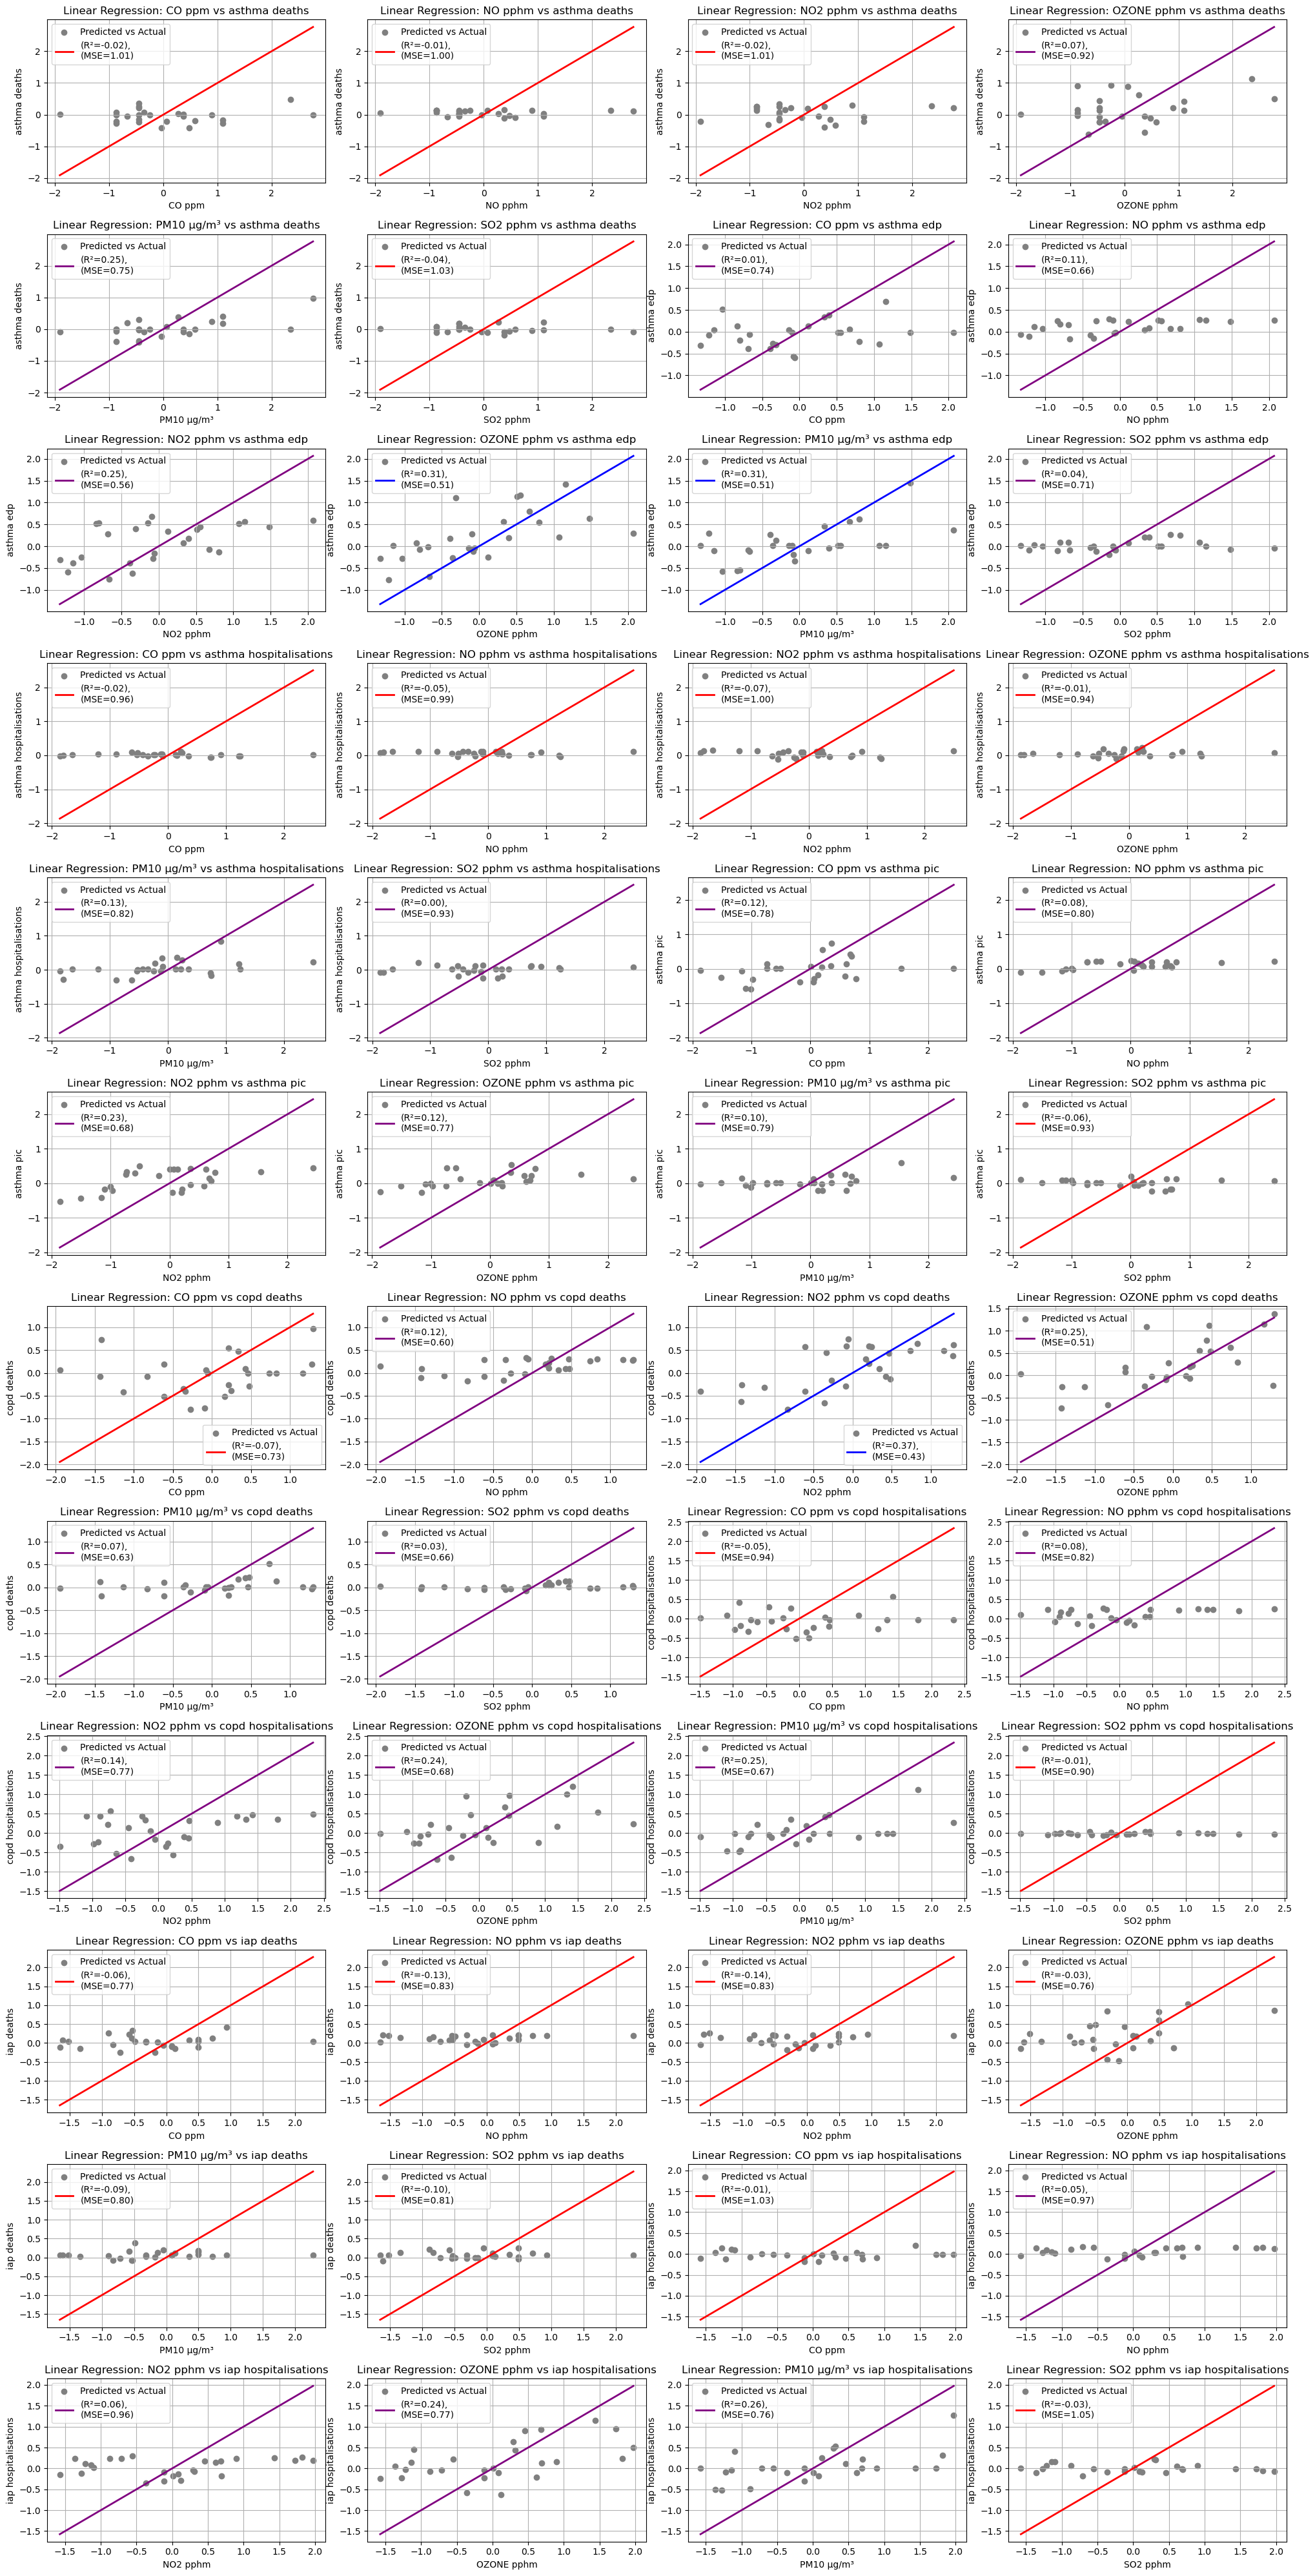

In [128]:
numerical_cols = df_all_data_ungender.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_all_data_ungender[numerical_cols] = scaler.fit_transform(df_all_data_ungender[numerical_cols])

# Define the independent variables (features) and the dependent variables (targets)
independent_vars = df_all_data_ungender.columns[2:8]
dependent_vars = df_all_data_ungender.columns[8:]

plot_number = 1

plt.figure(figsize=(20, 40))

for i in dependent_vars:
    for j in independent_vars:
        plt.subplot(12, 4, plot_number)
        
        X = df_all_data_ungender[[j]].values
        y = df_all_data_ungender[i].values
        
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)

        # Calculate Mean Squared Error 
        mse = mean_squared_error(y_test, y_pred)
        
        # Determine the color of the best fit line based on R² score
        if r2 <= 0:
            line_color = 'red'
        elif 0 < r2 <= 0.3:
            line_color = 'purple'
        elif 0.3 < r2 <= 0.5:
            line_color = 'blue'
        else:
            line_color = 'green'
        
        plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2, label=f'(R²={r2:.2f}),\n(MSE={mse:.2f})')
        plt.xlabel(j)
        plt.ylabel(i)
        plt.title(f'Linear Regression: {j} vs {i}')
        plt.legend()
        plt.grid(True)
        
        plot_number += 1

plt.tight_layout()
plt.show()